In [1]:
'''
20251113:
    分析不同语种神经元的激活情况

'''

'\n20251113:\n    分析不同语种神经元的激活情况\n\n'

In [26]:
from tqdm import tqdm

In [ ]:
import numpy as np


def get_quantile(data):
    # 示例数据（替换成你的数据）
    #data = [3.2, 5.1, 7.4, 2.8, 6.0, 4.9, 8.2, 1.5, 9.0]
    
    # 想查看的分位点（百分比形式，例如 0.25 表示 25% 分位）
    quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
    
    # 计算分位数
    results = np.quantile(data, quantiles)
    
    # 打印结果
    for q, r in zip(quantiles, results):
        print(f"{int(q*100)}% 分位数: {r}")


In [ ]:
def get_key_quan(data, key):
    all_neuron_data = []
    for inu in data[key]:#data['model.layers.0.mlp.down_proj.weight']:
        #print(inu.shape)
        all_neuron_data.extend(inu.float().numpy().tolist())
    
    get_quantile(all_neuron_data)

In [2]:
def calc_per_neu_mean(data):
    '''
    对每种语言，计算每个神经元的均值/方差

    '''
    result={}

    for ikey in data.keys():

        # mean & var dict
        result[ikey]={}

        
        result[ikey]['mean'] = np.mean(np.array([itmp.float().numpy().tolist() for itmp in data[ikey] ]), axis =1)
        result[ikey]['var'] = np.var(np.array([itmp.float().numpy().tolist() for itmp in data[ikey] ]), axis = 1)
    return result
        

In [3]:
def calc_mean_var_diff(result_other_lang, result_en):
    '''
    计算其他语言和英语神经元 均值和方差的diff

    '''

    all_mean_diff = []
    for ikey in result_other_lang.keys():
        o_lang = np.array(result_other_lang[ikey]['mean'].tolist())
        en_lang = np.array(result_en[ikey]['mean'].tolist())

        mean_diff = o_lang - en_lang

        all_mean_diff.extend(mean_diff.tolist())

    return all_mean_diff
    

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 你的 diff 数据

def drwa_ecdf(data):
    '''
    data = np.array([
        0.00023478745424654335,
        -8.707778761163354e-05,
        -0.0002664269686647458,
        -0.00013238142128102481,
        1.3182201655581594e-05,
        -5.4263437050394714e-05,
        -0.0002950956331915222,
        -0.0004534808249445632
    ])
    '''
    
    # ECDF 计算
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    
    # 画图
    plt.figure(figsize=(6, 4))
    plt.step(x, y, where='post')
    plt.xlabel("diff values")
    plt.ylabel("ECDF")
    plt.title("ECDF of diff distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [5]:

def plot_ecdf_groups(data_groups, labels=None):
    """
    data_groups: list of 1D arrays/lists
    labels: list of names for each group
    """
    plt.figure(figsize=(8, 5))

    if labels is None:
        labels = [f"group_{i}" for i in range(len(data_groups))]

    for data, name in zip(data_groups, labels):
        data = np.array(data)
        x = np.sort(data)
        y = np.arange(1, len(x) + 1) / len(x)
        #plt.step(x, y, where='post', label=name)
        plt.step(x, y, where='post', label=name, alpha=0.6)

    plt.xlabel("Value")
    plt.ylabel("ECDF")
    plt.title("ECDF Comparison Across Groups")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
import matplotlib.pyplot as plt


def draw_box(data):
    # 你的数据（示例）
    '''
    data = [
        0.00023478745424654335,
        -8.707778761163354e-05,
        -0.0002664269686647458,
        -0.00013238142128102481,
        1.3182201655581594e-05,
        -5.4263437050394714e-05,
        -0.0002950956331915222,
        -0.0004534808249445632
    ]
    '''
    
    plt.figure(figsize=(5, 6))
    plt.boxplot(
        data,
        vert=True,
        showfliers=True         # 如要隐藏异常值点可改为 False
    )
    plt.ylabel("diff values")
    plt.title("Boxplot of diff distribution")
    plt.grid(True, linestyle="--", alpha=0.5)
    
    plt.tight_layout()
    plt.show()


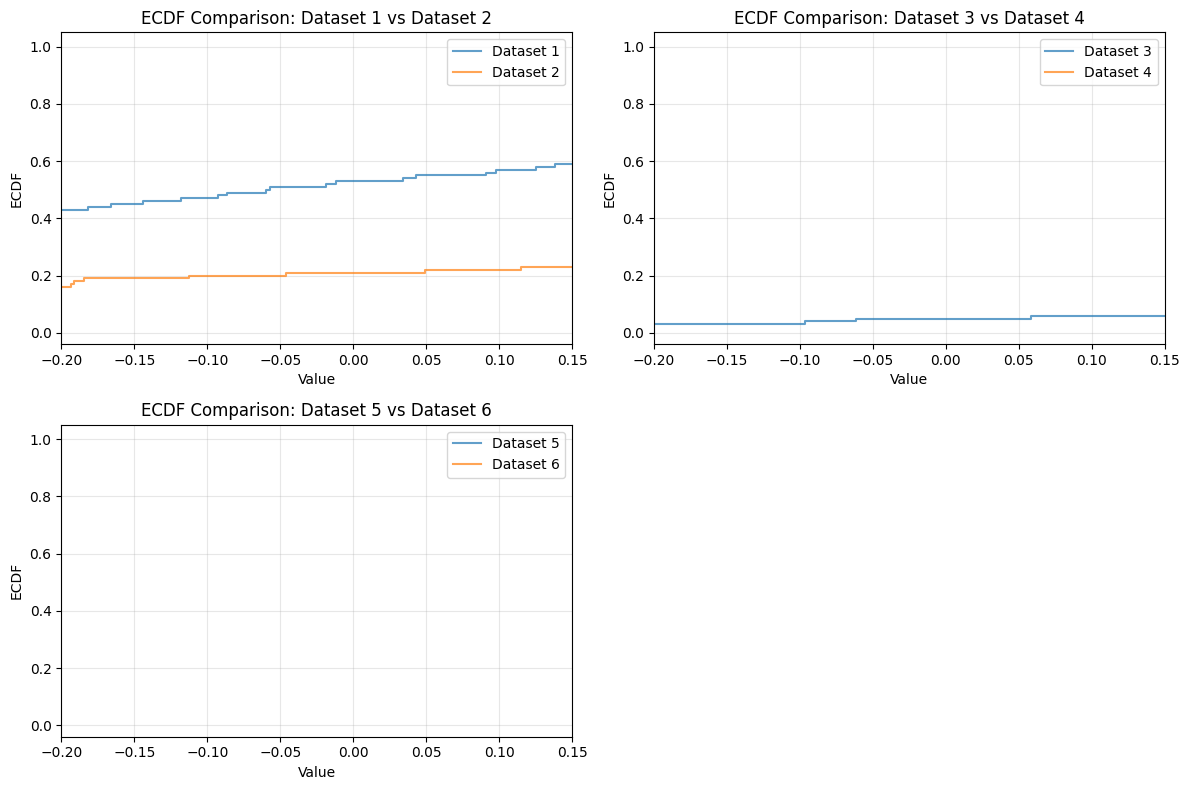

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ecdf_pairs(data_groups, labels=None,xdim_min = -0.2, xdim_max= 0.15):
    """
    data_groups: list of 1D arrays/lists (up to 26 groups)
    labels: list of names for each group
    Each subplot shows ECDF of 2 groups for comparison
    """
    if labels is None:
        labels = [f"group_{i+1}" for i in range(len(data_groups))]
    
    # Calculate number of subplots needed (each subplot has 2 groups)
    total_groups = len(data_groups)
    total_subplots = int(np.ceil(total_groups / 2))
    
    # Determine grid layout (try to make it as square as possible)
    cols = int(np.ceil(np.sqrt(total_subplots)))
    rows = int(np.ceil(total_subplots / cols))
    
    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    
    # Handle cases where there's only one subplot
    if total_subplots == 1:
        axes = np.array([axes])
    elif rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    else:
        axes = axes if total_subplots > 1 else np.array([[axes]])
    
    # Plot ECDF for each pair of groups
    subplot_idx = 0
    for i in range(0, total_groups, 2):
        # Determine current subplot position
        row = subplot_idx // cols
        col = subplot_idx % cols
        
        # Get the current axis
        if rows == 1:
            ax = axes[0, col]
        elif cols == 1:
            ax = axes[row, 0]
        else:
            ax = axes[row, col]
        
        # Plot first group
        data1 = np.array(data_groups[i])
        x1 = np.sort(data1)
        y1 = np.arange(1, len(x1) + 1) / len(x1)
        ax.step(x1, y1, where='post', label=labels[i], alpha=0.7, linewidth=1.5)
        
        # Plot second group if it exists
        if i + 1 < total_groups:
            data2 = np.array(data_groups[i + 1])
            x2 = np.sort(data2)
            y2 = np.arange(1, len(x2) + 1) / len(x2)
            ax.step(x2, y2, where='post', label=labels[i + 1], alpha=0.7, linewidth=1.5)
        
        ax.set_xlabel("Value")
        ax.set_ylabel("ECDF")
        ax.set_title(f"ECDF Comparison: {labels[i]} vs {labels[i+1] if i+1 < total_groups else 'N/A'}")
        ax.grid(alpha=0.3)
        ax.legend()

        # Set Y-axis range to -0.2 to 0.15
        ax.set_xlim(xdim_min, xdim_max)
        
        subplot_idx += 1
    
    # Hide unused subplots
    for i in range(subplot_idx, rows * cols):
        row = i // cols
        col = i % cols
        if rows == 1:
            axes[0, col].set_visible(False)
        elif cols == 1:
            axes[row, 0].set_visible(False)
        else:
            axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Example usage with 6 groups (can be extended up to 26)
data_groups = [np.random.normal(loc=i, scale=1.2, size=100) for i in range(6)]
labels = [f'Dataset {i+1}' for i in range(len(data_groups))]

plot_ecdf_pairs(data_groups, labels)

# Example with 26 groups
# data_groups_26 = [np.random.normal(loc=i, scale=1.2, size=100) for i in range(26)]
# labels_26 = [f'Group {chr(65+i)}' for i in range(26)]  # A to Z
# plot_ecdf_pairs(data_groups_26, labels_26)





In [8]:
!pip install scipy

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [41]:
import numpy as np
import sklearn
from scipy.stats import pearsonr, spearmanr, ks_2samp
from scipy.stats import wasserstein_distance
from sklearn.feature_selection import mutual_info_regression
import pandas as pd


# ---------- CKA helpers ----------
def gram_linear(x):
    return x @ x.T

def center_gram(g):
    n = g.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    return H @ g @ H

def cka_score(x, y):
    # x, y shape: (num_samples,)
    # reshape to (samples, 1 neuron) so CKA can run
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    K = center_gram(gram_linear(x))
    L = center_gram(gram_linear(y))

    hsic = np.sum(K * L)
    norm = np.sqrt(np.sum(K * K) * np.sum(L * L))

    return hsic / norm


# ---------- Top-K overlap ----------
def topk_overlap(x, y, k=50):
    idx_x = np.argsort(x)[-k:]
    idx_y = np.argsort(y)[-k:]
    return len(set(idx_x) & set(idx_y)) / k



# ============================================================
#                    主函数：扩展版
# ============================================================
def compute_column_correlations(matrix1, matrix2, method='pearson', topk=50):
    """
    支持以下 method：
      - pearson
      - spearman
      - cosine
      - mi               (mutual information)
      - cka
      - wasserstein
      - ks               (Kolmogorov-Smirnov)
      - topk             (top-k neuron overlap rate)
    """

    # Convert to numpy arrays if they are DataFrames
    if isinstance(matrix1, pd.DataFrame):
        matrix1 = matrix1.values
    if isinstance(matrix2, pd.DataFrame):
        matrix2 = matrix2.values
    
    assert matrix1.shape[1] == matrix2.shape[1], "Matrices must have the same number of columns"

    n_cols = matrix1.shape[1]
    correlations = np.zeros(n_cols)
    p_values = np.zeros(n_cols)

    print(matrix1.shape, matrix2.shape)

    for i in range(n_cols):
        v1 = matrix1[:, i]
        v2 = matrix2[:, i]

        # 1. Pearson
        if method == 'pearson':
            corr, p = pearsonr(v1, v2)
            correlations[i] = corr
            p_values[i] = p

        # 2. Spearman
        elif method == 'spearman':
            corr, p = spearmanr(v1, v2)
            correlations[i] = corr
            p_values[i] = p

        # 3. Cosine similarity
        elif method == 'cosine':
            correlations[i] = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
            p_values[i] = np.nan

        # 4. Mutual information
        elif method == 'mi':
            correlations[i] = mutual_info_regression(v1.reshape(-1, 1), v2)[0]
            p_values[i] = np.nan

        # 5. CKA
        elif method == 'cka':
            correlations[i] = cka_score(v1, v2)
            p_values[i] = np.nan

        # 6. Wasserstein (distribution distance)
        elif method == 'wasserstein':
            correlations[i] = -wasserstein_distance(v1, v2)  
            # 越大越好，所以取负
            p_values[i] = np.nan

        # 7. KS-test
        elif method == 'ks':
            stat, p = ks_2samp(v1, v2)
            correlations[i] = -stat  
            # 越接近 0 越相似，这里取负表示"相似度"
            p_values[i] = p

        # 8. Top-K neuron overlap
        elif method == 'topk':
            correlations[i] = topk_overlap(v1, v2, k=topk)
            p_values[i] = np.nan

        else:
            raise ValueError(f"Unknown method: {method}")

    return correlations, p_values


In [42]:
#!pip install -U scikit-learn scipy matplotlib

In [45]:
def calc_per_neu_pvalue(data1, data2, method='pearson'):
    '''
    对每种语言，计算每个神经元的均值/方差

    '''
    result={}

    bar = tqdm(total=len(data1.keys()))

    for ikey in data1.keys():
        if "layers" not in ikey: continue
        # mean & var dict
        result[ikey]={}

        
        result[ikey]['p'] = compute_column_correlations(
            np.array([itmp.float().numpy().tolist() for itmp in data1[ikey] ]),
            np.array([itmp.float().numpy().tolist() for itmp in data2[ikey] ]),
            method= method

        )
                


        bar.update(1)
        
    return result
        

# 20251113

In [11]:
import torch

In [12]:
data_path='/root/autodl-fs/output_grad/gemma-3-1b-it/en/lrp.pt'

In [13]:
data = torch.load(data_path, map_location=torch.device('cpu'))



In [14]:
data_vi = torch.load('/root/autodl-fs/output_grad/gemma-3-1b-it/vi/lrp.pt', map_location=torch.device('cpu'))

In [15]:
data_neu_result = calc_per_neu_mean(data)
data_vi_neu_result = calc_per_neu_mean(data_vi)

In [16]:
mean_diff=calc_mean_var_diff(data_vi_neu_result, data_neu_result)

In [17]:
data_neu_all_mean = []
data_vi_neu_all_mean = []

for ikey in data_neu_result.keys():
    data_neu_all_mean.extend(data_neu_result[ikey]['mean'])
    data_vi_neu_all_mean.extend(data_vi_neu_result[ikey]['mean'])

    

In [18]:
data_neu_all_var = []
data_vi_neu_all_var = []

for ikey in data_neu_result.keys():
    data_neu_all_var.extend(data_neu_result[ikey]['var'])
    data_vi_neu_all_var.extend(data_vi_neu_result[ikey]['var'])

    

In [19]:
'''
均值diff的分布范围

'''

'\n均值diff的分布范围\n\n'

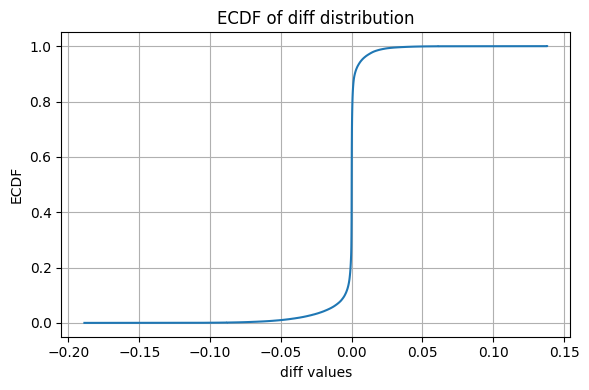

In [20]:
drwa_ecdf(np.array(mean_diff))

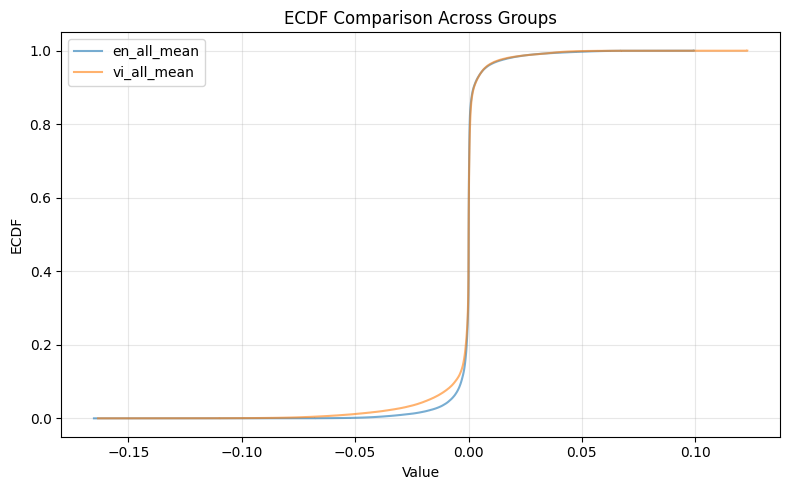

In [21]:
plot_ecdf_groups([
                    #np.array(mean_diff), 
                    #data_neu_result['model.layers.6.mlp.down_proj.weight']['mean'],
                    #data_vi_neu_result['model.layers.6.mlp.down_proj.weight']['mean'],
                    data_neu_all_mean,
                    data_vi_neu_all_mean
                 ], 
                 labels=[
                     #'all_mean_diff', 
                     #'en_s_key_mean',
                     #'vi_s_key_mean', 
                     'en_all_mean', 'vi_all_mean'])

In [ ]:
data_neu_enAvi_result_per_layer = []
data_neu_enAvi_result_per_layer_labels = []

for ilayer in range(26):
    data_neu_enAvi_result_per_layer.append(data_neu_result[f'model.layers.{ilayer}.mlp.down_proj.weight']['mean'])
    data_neu_enAvi_result_per_layer.append(data_vi_neu_result[f'model.layers.{ilayer}.mlp.down_proj.weight']['mean'])

    data_neu_enAvi_result_per_layer_labels.append(f'en_s_key_mean_layer{ilayer}')
    data_neu_enAvi_result_per_layer_labels.append(f'vi_s_key_mean_layer{ilayer}')
    
plot_ecdf_pairs(data_neu_enAvi_result_per_layer, data_neu_enAvi_result_per_layer_labels)

### 按层其值的范围变化

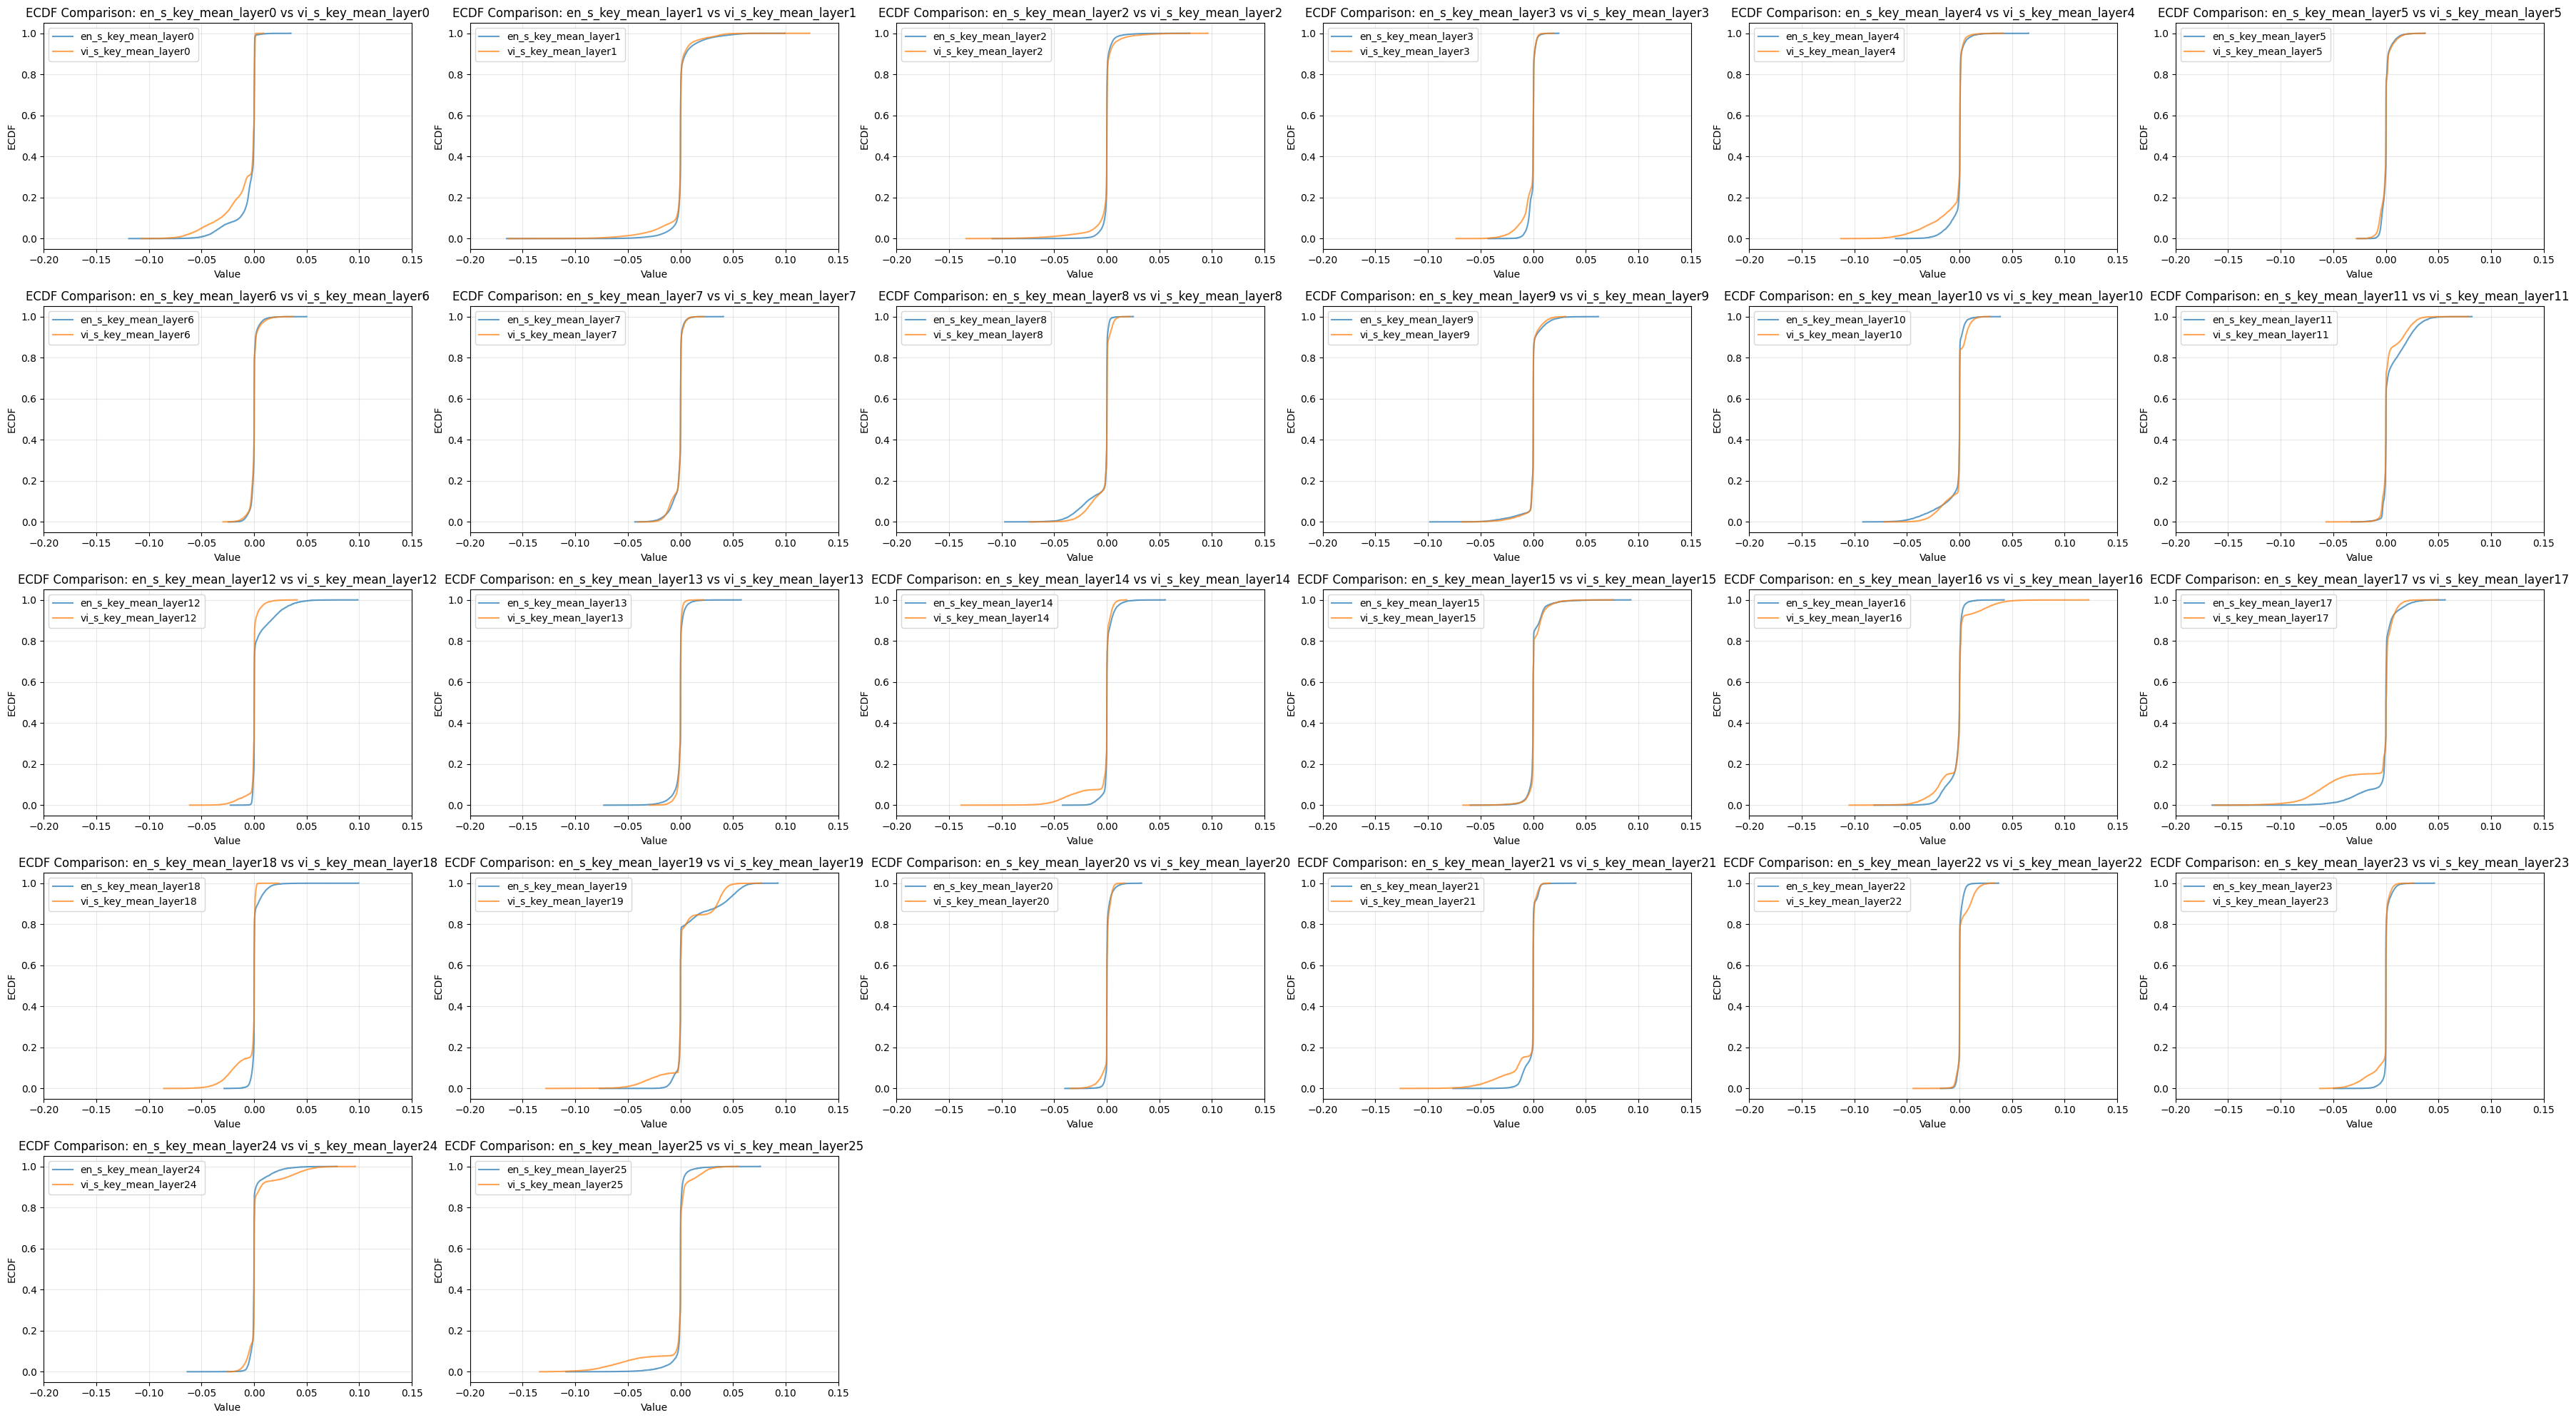

In [27]:
data_neu_enAvi_result_per_layer = []
data_neu_enAvi_result_per_layer_labels = []

for ilayer in range(26):

    en_result_tmp = []
    vi_result_tmp = []
    for ikey in data_neu_result.keys():
        if f'layers.{ilayer}' in ikey:
            en_result_tmp.extend(data_neu_result[ikey]['mean'])
            vi_result_tmp.extend(data_vi_neu_result[ikey]['mean'])
    
    
    data_neu_enAvi_result_per_layer.append(en_result_tmp)
    data_neu_enAvi_result_per_layer.append(vi_result_tmp)

    data_neu_enAvi_result_per_layer_labels.append(f'en_s_key_mean_layer{ilayer}')
    data_neu_enAvi_result_per_layer_labels.append(f'vi_s_key_mean_layer{ilayer}')
    
plot_ecdf_pairs(data_neu_enAvi_result_per_layer, data_neu_enAvi_result_per_layer_labels)

In [ ]:
TODO  每个key的范围的差别？？？？？

## 计算相关性

In [28]:
result_relation = calc_per_neu_pvalue(data, data_vi)

  0%|          | 0/340 [00:00<?, ?it/s]

(1000, 262144) (1000, 262144)


/tmp/ipykernel_989/3442345701.py:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = pearsonr(matrix1[:, i], matrix2[:, i])
  0%|          | 1/340 [01:47<10:08:36, 107.72s/it]

(1000, 1024) (1000, 1024)


  1%|          | 4/340 [01:48<1:22:30, 14.73s/it]  

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


  2%|▏         | 6/340 [01:48<35:23,  6.36s/it]  

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


  2%|▏         | 8/340 [01:51<21:33,  3.89s/it]

(1000, 6912) (1000, 6912)


  3%|▎         | 9/340 [01:54<19:41,  3.57s/it]

(1000, 1152) (1000, 1152)


  3%|▎         | 10/340 [01:54<14:57,  2.72s/it]

(1000, 1152) (1000, 1152)


  3%|▎         | 11/340 [01:55<11:23,  2.08s/it]

(1000, 1152) (1000, 1152)


  4%|▎         | 12/340 [01:55<08:45,  1.60s/it]

(1000, 1152) (1000, 1152)


  4%|▍         | 13/340 [01:55<06:51,  1.26s/it]

(1000, 1152) (1000, 1152)


  4%|▍         | 14/340 [01:56<05:28,  1.01s/it]

(1000, 1024) (1000, 1024)


  5%|▌         | 17/340 [01:56<02:38,  2.04it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


  6%|▌         | 20/340 [01:57<01:40,  3.17it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


  6%|▌         | 21/340 [02:00<04:24,  1.21it/s]

(1000, 6912) (1000, 6912)


  6%|▋         | 22/340 [02:02<06:42,  1.27s/it]

(1000, 1152) (1000, 1152)


  7%|▋         | 23/340 [02:03<05:35,  1.06s/it]

(1000, 1152) (1000, 1152)


  7%|▋         | 24/340 [02:03<04:42,  1.12it/s]

(1000, 1152) (1000, 1152)


  7%|▋         | 25/340 [02:04<04:02,  1.30it/s]

(1000, 1152) (1000, 1152)


  8%|▊         | 26/340 [02:04<03:33,  1.47it/s]

(1000, 1152) (1000, 1152)


  8%|▊         | 27/340 [02:04<03:10,  1.64it/s]

(1000, 1024) (1000, 1024)


  9%|▉         | 30/340 [02:05<01:39,  3.10it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


  9%|▉         | 32/340 [02:06<01:26,  3.57it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 10%|█         | 34/340 [02:08<04:00,  1.27it/s]

(1000, 6912) (1000, 6912)


 10%|█         | 35/340 [02:11<06:24,  1.26s/it]

(1000, 1152) (1000, 1152)


 11%|█         | 36/340 [02:11<05:16,  1.04s/it]

(1000, 1152) (1000, 1152)


 11%|█         | 37/340 [02:12<04:25,  1.14it/s]

(1000, 1152) (1000, 1152)


 11%|█         | 38/340 [02:12<03:48,  1.32it/s]

(1000, 1152) (1000, 1152)


 11%|█▏        | 39/340 [02:13<03:18,  1.52it/s]

(1000, 1152) (1000, 1152)


 12%|█▏        | 40/340 [02:13<02:58,  1.68it/s]

(1000, 1024) (1000, 1024)


 12%|█▏        | 42/340 [02:14<02:00,  2.47it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 14%|█▎        | 46/340 [02:14<01:12,  4.07it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 14%|█▍        | 47/340 [02:17<03:53,  1.25it/s]

(1000, 6912) (1000, 6912)


 14%|█▍        | 48/340 [02:20<06:07,  1.26s/it]

(1000, 1152) (1000, 1152)


 14%|█▍        | 49/340 [02:20<05:05,  1.05s/it]

(1000, 1152) (1000, 1152)


 15%|█▍        | 50/340 [02:21<04:17,  1.13it/s]

(1000, 1152) (1000, 1152)


 15%|█▌        | 51/340 [02:21<03:42,  1.30it/s]

(1000, 1152) (1000, 1152)


 15%|█▌        | 52/340 [02:22<03:13,  1.49it/s]

(1000, 1152) (1000, 1152)


 16%|█▌        | 53/340 [02:22<02:52,  1.67it/s]

(1000, 1024) (1000, 1024)


 16%|█▋        | 56/340 [02:23<01:36,  2.95it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 17%|█▋        | 59/340 [02:23<01:10,  3.98it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 18%|█▊        | 60/340 [02:26<03:40,  1.27it/s]

(1000, 6912) (1000, 6912)


 18%|█▊        | 61/340 [02:28<05:40,  1.22s/it]

(1000, 1152) (1000, 1152)


 18%|█▊        | 62/340 [02:29<04:41,  1.01s/it]

(1000, 1152) (1000, 1152)


 19%|█▊        | 63/340 [02:29<03:56,  1.17it/s]

(1000, 1152) (1000, 1152)


 19%|█▉        | 64/340 [02:30<03:23,  1.36it/s]

(1000, 1152) (1000, 1152)


 19%|█▉        | 65/340 [02:30<02:59,  1.53it/s]

(1000, 1152) (1000, 1152)


 19%|█▉        | 66/340 [02:31<02:39,  1.72it/s]

(1000, 1024) (1000, 1024)


 20%|██        | 69/340 [02:31<01:27,  3.09it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 21%|██        | 72/340 [02:32<01:04,  4.16it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 21%|██▏       | 73/340 [02:34<03:28,  1.28it/s]

(1000, 6912) (1000, 6912)


 22%|██▏       | 74/340 [02:37<05:30,  1.24s/it]

(1000, 1152) (1000, 1152)


 22%|██▏       | 75/340 [02:37<04:32,  1.03s/it]

(1000, 1152) (1000, 1152)


 22%|██▏       | 76/340 [02:38<03:48,  1.16it/s]

(1000, 1152) (1000, 1152)


 23%|██▎       | 77/340 [02:38<03:14,  1.35it/s]

(1000, 1152) (1000, 1152)


 23%|██▎       | 78/340 [02:39<02:50,  1.54it/s]

(1000, 1152) (1000, 1152)


 23%|██▎       | 79/340 [02:39<02:31,  1.72it/s]

(1000, 1024) (1000, 1024)


 24%|██▍       | 82/340 [02:40<01:23,  3.09it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 25%|██▌       | 85/340 [02:40<01:02,  4.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 25%|██▌       | 86/340 [02:43<03:15,  1.30it/s]

(1000, 6912) (1000, 6912)


 26%|██▌       | 87/340 [02:45<05:07,  1.22s/it]

(1000, 1152) (1000, 1152)


 26%|██▌       | 88/340 [02:46<04:14,  1.01s/it]

(1000, 1152) (1000, 1152)


 26%|██▌       | 89/340 [02:46<03:34,  1.17it/s]

(1000, 1152) (1000, 1152)


 26%|██▋       | 90/340 [02:47<03:02,  1.37it/s]

(1000, 1152) (1000, 1152)


 27%|██▋       | 91/340 [02:47<02:39,  1.56it/s]

(1000, 1152) (1000, 1152)


 27%|██▋       | 92/340 [02:47<02:22,  1.74it/s]

(1000, 1024) (1000, 1024)


 28%|██▊       | 95/340 [02:48<01:16,  3.21it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 29%|██▉       | 98/340 [02:49<00:56,  4.27it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 29%|██▉       | 99/340 [02:51<03:26,  1.17it/s]

(1000, 6912) (1000, 6912)


 29%|██▉       | 100/340 [02:54<05:23,  1.35s/it]

(1000, 1152) (1000, 1152)


 30%|██▉       | 101/340 [02:55<04:24,  1.11s/it]

(1000, 1152) (1000, 1152)


 30%|███       | 102/340 [02:55<03:39,  1.08it/s]

(1000, 1152) (1000, 1152)


 30%|███       | 103/340 [02:56<03:04,  1.28it/s]

(1000, 1152) (1000, 1152)


 31%|███       | 104/340 [02:56<02:41,  1.46it/s]

(1000, 1152) (1000, 1152)


 31%|███       | 105/340 [02:56<02:24,  1.63it/s]

(1000, 1024) (1000, 1024)


 32%|███▏      | 108/340 [02:57<01:19,  2.92it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 33%|███▎      | 111/340 [02:58<00:58,  3.94it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 33%|███▎      | 112/340 [03:00<03:02,  1.25it/s]

(1000, 6912) (1000, 6912)


 33%|███▎      | 113/340 [03:03<04:42,  1.24s/it]

(1000, 1152) (1000, 1152)


 34%|███▎      | 114/340 [03:03<03:53,  1.03s/it]

(1000, 1152) (1000, 1152)


 34%|███▍      | 115/340 [03:04<03:15,  1.15it/s]

(1000, 1152) (1000, 1152)


 34%|███▍      | 116/340 [03:04<02:47,  1.34it/s]

(1000, 1152) (1000, 1152)


 34%|███▍      | 117/340 [03:05<02:24,  1.54it/s]

(1000, 1152) (1000, 1152)


 35%|███▍      | 118/340 [03:05<02:08,  1.73it/s]

(1000, 1024) (1000, 1024)


 36%|███▌      | 121/340 [03:06<01:11,  3.06it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 36%|███▋      | 124/340 [03:06<00:53,  4.05it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 37%|███▋      | 125/340 [03:09<02:52,  1.24it/s]

(1000, 6912) (1000, 6912)


 37%|███▋      | 126/340 [03:12<04:28,  1.25s/it]

(1000, 1152) (1000, 1152)


 37%|███▋      | 127/340 [03:12<03:40,  1.04s/it]

(1000, 1152) (1000, 1152)


 38%|███▊      | 128/340 [03:12<03:05,  1.14it/s]

(1000, 1152) (1000, 1152)


 38%|███▊      | 129/340 [03:13<02:37,  1.34it/s]

(1000, 1152) (1000, 1152)


 38%|███▊      | 130/340 [03:13<02:15,  1.54it/s]

(1000, 1152) (1000, 1152)


 39%|███▊      | 131/340 [03:14<02:01,  1.72it/s]

(1000, 1024) (1000, 1024)


 39%|███▉      | 134/340 [03:14<01:08,  3.02it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 40%|████      | 137/340 [03:15<00:50,  4.01it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 41%|████      | 138/340 [03:17<02:39,  1.27it/s]

(1000, 6912) (1000, 6912)


 41%|████      | 139/340 [03:20<04:06,  1.23s/it]

(1000, 1152) (1000, 1152)


 41%|████      | 140/340 [03:20<03:23,  1.02s/it]

(1000, 1152) (1000, 1152)


 41%|████▏     | 141/340 [03:21<02:51,  1.16it/s]

(1000, 1152) (1000, 1152)


 42%|████▏     | 142/340 [03:21<02:26,  1.35it/s]

(1000, 1152) (1000, 1152)


 42%|████▏     | 143/340 [03:22<02:07,  1.54it/s]

(1000, 1152) (1000, 1152)


 42%|████▏     | 144/340 [03:22<01:54,  1.71it/s]

(1000, 1024) (1000, 1024)


 43%|████▎     | 147/340 [03:23<01:02,  3.07it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 44%|████▍     | 150/340 [03:23<00:46,  4.10it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 44%|████▍     | 151/340 [03:26<02:27,  1.28it/s]

(1000, 6912) (1000, 6912)


 45%|████▍     | 152/340 [03:29<03:51,  1.23s/it]

(1000, 1152) (1000, 1152)


 45%|████▌     | 153/340 [03:29<03:10,  1.02s/it]

(1000, 1152) (1000, 1152)


 45%|████▌     | 154/340 [03:29<02:38,  1.18it/s]

(1000, 1152) (1000, 1152)


 46%|████▌     | 155/340 [03:30<02:14,  1.38it/s]

(1000, 1152) (1000, 1152)


 46%|████▌     | 156/340 [03:30<01:56,  1.58it/s]

(1000, 1152) (1000, 1152)


 46%|████▌     | 157/340 [03:31<01:44,  1.76it/s]

(1000, 1024) (1000, 1024)


 47%|████▋     | 160/340 [03:31<00:57,  3.13it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 48%|████▊     | 163/340 [03:32<00:42,  4.21it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 48%|████▊     | 164/340 [03:34<02:17,  1.28it/s]

(1000, 6912) (1000, 6912)


 49%|████▊     | 165/340 [03:37<03:41,  1.27s/it]

(1000, 1152) (1000, 1152)


 49%|████▉     | 166/340 [03:38<03:02,  1.05s/it]

(1000, 1152) (1000, 1152)


 49%|████▉     | 167/340 [03:38<02:32,  1.14it/s]

(1000, 1152) (1000, 1152)


 49%|████▉     | 168/340 [03:38<02:11,  1.31it/s]

(1000, 1152) (1000, 1152)


 50%|████▉     | 169/340 [03:39<01:53,  1.50it/s]

(1000, 1152) (1000, 1152)


 50%|█████     | 170/340 [03:39<01:42,  1.66it/s]

(1000, 1024) (1000, 1024)


 51%|█████     | 172/340 [03:40<01:12,  2.33it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 51%|█████     | 173/340 [03:40<00:58,  2.87it/s]

(1000, 1152) (1000, 1152)


 51%|█████▏    | 175/340 [03:41<00:59,  2.78it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 52%|█████▏    | 176/340 [03:41<00:49,  3.34it/s]

(1000, 6912) (1000, 6912)


 52%|█████▏    | 177/340 [03:44<03:15,  1.20s/it]

(1000, 6912) (1000, 6912)


 52%|█████▏    | 178/340 [03:47<04:24,  1.63s/it]

(1000, 1152) (1000, 1152)


 53%|█████▎    | 179/340 [03:47<03:24,  1.27s/it]

(1000, 1152) (1000, 1152)


 53%|█████▎    | 180/340 [03:48<02:42,  1.02s/it]

(1000, 1152) (1000, 1152)


 53%|█████▎    | 181/340 [03:48<02:13,  1.19it/s]

(1000, 1152) (1000, 1152)


 54%|█████▎    | 182/340 [03:49<01:53,  1.40it/s]

(1000, 1152) (1000, 1152)


 54%|█████▍    | 183/340 [03:49<01:38,  1.59it/s]

(1000, 1024) (1000, 1024)


 55%|█████▍    | 186/340 [03:50<00:52,  2.93it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 56%|█████▌    | 189/340 [03:50<00:37,  4.01it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 56%|█████▌    | 190/340 [03:53<01:58,  1.27it/s]

(1000, 6912) (1000, 6912)


 56%|█████▌    | 191/340 [03:56<03:06,  1.25s/it]

(1000, 1152) (1000, 1152)


 56%|█████▋    | 192/340 [03:56<02:32,  1.03s/it]

(1000, 1152) (1000, 1152)


 57%|█████▋    | 193/340 [03:56<02:07,  1.15it/s]

(1000, 1152) (1000, 1152)


 57%|█████▋    | 194/340 [03:57<01:47,  1.36it/s]

(1000, 1152) (1000, 1152)


 57%|█████▋    | 195/340 [03:57<01:33,  1.56it/s]

(1000, 1152) (1000, 1152)


 58%|█████▊    | 196/340 [03:58<01:23,  1.72it/s]

(1000, 1024) (1000, 1024)


 59%|█████▊    | 199/340 [03:58<00:46,  3.06it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 59%|█████▉    | 202/340 [03:59<00:33,  4.11it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 60%|█████▉    | 203/340 [04:01<01:45,  1.29it/s]

(1000, 6912) (1000, 6912)


 60%|██████    | 204/340 [04:04<02:45,  1.22s/it]

(1000, 1152) (1000, 1152)


 60%|██████    | 205/340 [04:04<02:16,  1.01s/it]

(1000, 1152) (1000, 1152)


 61%|██████    | 206/340 [04:05<01:53,  1.18it/s]

(1000, 1152) (1000, 1152)


 61%|██████    | 207/340 [04:05<01:36,  1.38it/s]

(1000, 1152) (1000, 1152)


 61%|██████    | 208/340 [04:06<01:23,  1.58it/s]

(1000, 1152) (1000, 1152)


 61%|██████▏   | 209/340 [04:06<01:15,  1.74it/s]

(1000, 1024) (1000, 1024)


 62%|██████▏   | 212/340 [04:07<00:41,  3.07it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 63%|██████▎   | 215/340 [04:07<00:30,  4.09it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 64%|██████▎   | 216/340 [04:10<01:36,  1.29it/s]

(1000, 6912) (1000, 6912)


 64%|██████▍   | 217/340 [04:12<02:31,  1.23s/it]

(1000, 1152) (1000, 1152)


 64%|██████▍   | 218/340 [04:13<02:04,  1.02s/it]

(1000, 1152) (1000, 1152)


 64%|██████▍   | 219/340 [04:13<01:43,  1.17it/s]

(1000, 1152) (1000, 1152)


 65%|██████▍   | 220/340 [04:14<01:27,  1.38it/s]

(1000, 1152) (1000, 1152)


 65%|██████▌   | 221/340 [04:14<01:15,  1.57it/s]

(1000, 1152) (1000, 1152)


 65%|██████▌   | 222/340 [04:14<01:07,  1.76it/s]

(1000, 1024) (1000, 1024)


 66%|██████▌   | 225/340 [04:15<00:36,  3.12it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 67%|██████▋   | 228/340 [04:16<00:27,  4.10it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 67%|██████▋   | 229/340 [04:18<01:25,  1.30it/s]

(1000, 6912) (1000, 6912)


 68%|██████▊   | 230/340 [04:21<02:14,  1.22s/it]

(1000, 1152) (1000, 1152)


 68%|██████▊   | 231/340 [04:21<01:50,  1.01s/it]

(1000, 1152) (1000, 1152)


 68%|██████▊   | 232/340 [04:22<01:32,  1.17it/s]

(1000, 1152) (1000, 1152)


 69%|██████▊   | 233/340 [04:22<01:18,  1.37it/s]

(1000, 1152) (1000, 1152)


 69%|██████▉   | 234/340 [04:22<01:08,  1.55it/s]

(1000, 1152) (1000, 1152)


 69%|██████▉   | 235/340 [04:23<01:00,  1.73it/s]

(1000, 1024) (1000, 1024)


 70%|███████   | 238/340 [04:23<00:33,  3.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 71%|███████   | 241/340 [04:24<00:23,  4.25it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 71%|███████   | 242/340 [04:27<01:27,  1.12it/s]

(1000, 6912) (1000, 6912)


 71%|███████▏  | 243/340 [04:29<02:15,  1.40s/it]

(1000, 1152) (1000, 1152)


 72%|███████▏  | 244/340 [04:30<01:47,  1.12s/it]

(1000, 1152) (1000, 1152)


 72%|███████▏  | 245/340 [04:30<01:27,  1.09it/s]

(1000, 1152) (1000, 1152)


 72%|███████▏  | 246/340 [04:31<01:12,  1.29it/s]

(1000, 1152) (1000, 1152)


 73%|███████▎  | 247/340 [04:31<01:02,  1.49it/s]

(1000, 1152) (1000, 1152)


 73%|███████▎  | 248/340 [04:31<00:55,  1.66it/s]

(1000, 1024) (1000, 1024)


 74%|███████▍  | 251/340 [04:32<00:29,  3.01it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 74%|███████▍  | 253/340 [04:33<00:24,  3.50it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 75%|███████▌  | 255/340 [04:35<01:01,  1.37it/s]

(1000, 6912) (1000, 6912)


 75%|███████▌  | 256/340 [04:38<01:37,  1.17s/it]

(1000, 1152) (1000, 1152)


 76%|███████▌  | 257/340 [04:38<01:21,  1.02it/s]

(1000, 1152) (1000, 1152)


 76%|███████▌  | 258/340 [04:39<01:07,  1.21it/s]

(1000, 1152) (1000, 1152)


 76%|███████▌  | 259/340 [04:39<00:57,  1.40it/s]

(1000, 1152) (1000, 1152)


 76%|███████▋  | 260/340 [04:39<00:50,  1.59it/s]

(1000, 1152) (1000, 1152)


 77%|███████▋  | 261/340 [04:40<00:44,  1.77it/s]

(1000, 1024) (1000, 1024)


 78%|███████▊  | 264/340 [04:40<00:24,  3.09it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 79%|███████▊  | 267/340 [04:41<00:17,  4.15it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 79%|███████▉  | 268/340 [04:44<00:55,  1.29it/s]

(1000, 6912) (1000, 6912)


 79%|███████▉  | 269/340 [04:46<01:26,  1.22s/it]

(1000, 1152) (1000, 1152)


 79%|███████▉  | 270/340 [04:47<01:10,  1.01s/it]

(1000, 1152) (1000, 1152)


 80%|███████▉  | 271/340 [04:47<00:58,  1.18it/s]

(1000, 1152) (1000, 1152)


 80%|████████  | 272/340 [04:47<00:49,  1.37it/s]

(1000, 1152) (1000, 1152)


 80%|████████  | 273/340 [04:48<00:42,  1.58it/s]

(1000, 1152) (1000, 1152)


 81%|████████  | 274/340 [04:48<00:37,  1.76it/s]

(1000, 1024) (1000, 1024)


 81%|████████▏ | 277/340 [04:49<00:19,  3.17it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 82%|████████▏ | 280/340 [04:49<00:14,  4.21it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 83%|████████▎ | 281/340 [04:52<00:45,  1.30it/s]

(1000, 6912) (1000, 6912)


 83%|████████▎ | 282/340 [04:55<01:10,  1.22s/it]

(1000, 1152) (1000, 1152)


 83%|████████▎ | 283/340 [04:55<00:57,  1.01s/it]

(1000, 1152) (1000, 1152)


 84%|████████▎ | 284/340 [04:55<00:47,  1.18it/s]

(1000, 1152) (1000, 1152)


 84%|████████▍ | 285/340 [04:56<00:39,  1.38it/s]

(1000, 1152) (1000, 1152)


 84%|████████▍ | 286/340 [04:56<00:34,  1.59it/s]

(1000, 1152) (1000, 1152)


 84%|████████▍ | 287/340 [04:57<00:29,  1.78it/s]

(1000, 1024) (1000, 1024)


 85%|████████▌ | 290/340 [04:57<00:15,  3.18it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 86%|████████▌ | 293/340 [04:58<00:11,  4.25it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 86%|████████▋ | 294/340 [05:00<00:35,  1.30it/s]

(1000, 6912) (1000, 6912)


 87%|████████▋ | 295/340 [05:03<00:54,  1.22s/it]

(1000, 1152) (1000, 1152)


 87%|████████▋ | 296/340 [05:03<00:44,  1.01s/it]

(1000, 1152) (1000, 1152)


 87%|████████▋ | 297/340 [05:04<00:36,  1.19it/s]

(1000, 1152) (1000, 1152)


 88%|████████▊ | 298/340 [05:04<00:30,  1.38it/s]

(1000, 1152) (1000, 1152)


 88%|████████▊ | 299/340 [05:04<00:26,  1.57it/s]

(1000, 1152) (1000, 1152)


 88%|████████▊ | 300/340 [05:05<00:22,  1.76it/s]

(1000, 1024) (1000, 1024)


 89%|████████▉ | 303/340 [05:05<00:11,  3.17it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 90%|█████████ | 306/340 [05:06<00:07,  4.27it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 90%|█████████ | 307/340 [05:09<00:25,  1.29it/s]

(1000, 6912) (1000, 6912)


 91%|█████████ | 308/340 [05:11<00:39,  1.24s/it]

(1000, 1152) (1000, 1152)


 91%|█████████ | 309/340 [05:12<00:31,  1.02s/it]

(1000, 1152) (1000, 1152)


 91%|█████████ | 310/340 [05:12<00:27,  1.07it/s]

(1000, 1152) (1000, 1152)


 91%|█████████▏| 311/340 [05:13<00:25,  1.15it/s]

(1000, 1152) (1000, 1152)


 92%|█████████▏| 312/340 [05:14<00:22,  1.22it/s]

(1000, 1152) (1000, 1152)


 92%|█████████▏| 313/340 [05:14<00:21,  1.28it/s]

(1000, 1024) (1000, 1024)


 93%|█████████▎| 316/340 [05:15<00:09,  2.46it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 94%|█████████▍| 319/340 [05:16<00:05,  3.70it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 94%|█████████▍| 320/340 [05:18<00:19,  1.05it/s]

(1000, 6912) (1000, 6912)


 94%|█████████▍| 321/340 [05:21<00:27,  1.46s/it]

(1000, 1152) (1000, 1152)


 95%|█████████▍| 322/340 [05:22<00:20,  1.16s/it]

(1000, 1152) (1000, 1152)


 95%|█████████▌| 323/340 [05:22<00:16,  1.06it/s]

(1000, 1152) (1000, 1152)


 95%|█████████▌| 324/340 [05:22<00:12,  1.26it/s]

(1000, 1152) (1000, 1152)


 96%|█████████▌| 325/340 [05:23<00:10,  1.46it/s]

(1000, 1152) (1000, 1152)


 96%|█████████▌| 326/340 [05:23<00:08,  1.64it/s]

(1000, 1024) (1000, 1024)


 96%|█████████▋| 328/340 [05:24<00:04,  2.44it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 1152) (1000, 1152)


 98%|█████████▊| 332/340 [05:24<00:01,  4.24it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)
(1000, 6912) (1000, 6912)


 98%|█████████▊| 333/340 [05:27<00:06,  1.12it/s]

(1000, 6912) (1000, 6912)


 98%|█████████▊| 334/340 [05:30<00:08,  1.39s/it]

(1000, 1152) (1000, 1152)


 99%|█████████▊| 335/340 [05:30<00:05,  1.12s/it]

(1000, 1152) (1000, 1152)


 99%|█████████▉| 336/340 [05:31<00:03,  1.10it/s]

(1000, 1152) (1000, 1152)


 99%|█████████▉| 337/340 [05:31<00:02,  1.30it/s]

(1000, 1152) (1000, 1152)


 99%|█████████▉| 338/340 [05:31<00:01,  1.50it/s]

(1000, 1152) (1000, 1152)


100%|█████████▉| 339/340 [05:32<00:00,  1.70it/s]

(1000, 1152) (1000, 1152)


100%|██████████| 340/340 [05:32<00:00,  1.02it/s]


In [33]:
result_relation_spearman=calc_per_neu_pvalue(data, data_vi, method = 'spearman')

  0%|          | 0/340 [00:00<?, ?it/s]

(1000, 262144) (1000, 262144)


/tmp/ipykernel_989/3442345701.py:39: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = spearmanr(matrix1[:, i], matrix2[:, i])
  0%|          | 1/340 [00:58<5:30:44, 58.54s/it]

(1000, 1024) (1000, 1024)


  1%|          | 3/340 [00:59<1:15:16, 13.40s/it]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


  1%|          | 4/340 [00:59<45:50,  8.19s/it]  

(1000, 1152) (1000, 1152)


  2%|▏         | 6/340 [01:00<20:36,  3.70s/it]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


  2%|▏         | 7/340 [01:00<14:09,  2.55s/it]

(1000, 6912) (1000, 6912)


  2%|▏         | 8/340 [01:05<17:46,  3.21s/it]

(1000, 6912) (1000, 6912)


  3%|▎         | 9/340 [01:10<20:15,  3.67s/it]

(1000, 1152) (1000, 1152)


  3%|▎         | 10/340 [01:10<15:15,  2.77s/it]

(1000, 1152) (1000, 1152)


  3%|▎         | 11/340 [01:11<11:46,  2.15s/it]

(1000, 1152) (1000, 1152)


  4%|▎         | 12/340 [01:12<09:27,  1.73s/it]

(1000, 1152) (1000, 1152)


  4%|▍         | 13/340 [01:13<07:47,  1.43s/it]

(1000, 1152) (1000, 1152)


  4%|▍         | 14/340 [01:13<06:35,  1.21s/it]

(1000, 1024) (1000, 1024)


  5%|▍         | 16/340 [01:14<04:13,  1.28it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


  5%|▌         | 17/340 [01:14<03:12,  1.68it/s]

(1000, 1152) (1000, 1152)


  6%|▌         | 19/340 [01:15<02:40,  2.00it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


  6%|▌         | 20/340 [01:15<02:08,  2.49it/s]

(1000, 6912) (1000, 6912)


  6%|▌         | 21/340 [01:20<08:42,  1.64s/it]

(1000, 6912) (1000, 6912)


  6%|▋         | 22/340 [01:25<13:30,  2.55s/it]

(1000, 1152) (1000, 1152)


  7%|▋         | 23/340 [01:25<10:38,  2.01s/it]

(1000, 1152) (1000, 1152)


  7%|▋         | 24/340 [01:26<08:38,  1.64s/it]

(1000, 1152) (1000, 1152)


  7%|▋         | 25/340 [01:27<07:14,  1.38s/it]

(1000, 1152) (1000, 1152)


  8%|▊         | 26/340 [01:28<06:16,  1.20s/it]

(1000, 1152) (1000, 1152)


  8%|▊         | 27/340 [01:28<05:31,  1.06s/it]

(1000, 1024) (1000, 1024)


  9%|▊         | 29/340 [01:29<03:40,  1.41it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


  9%|▉         | 30/340 [01:29<02:49,  1.83it/s]

(1000, 1152) (1000, 1152)


  9%|▉         | 32/340 [01:30<02:28,  2.07it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 10%|▉         | 33/340 [01:30<01:59,  2.56it/s]

(1000, 6912) (1000, 6912)


 10%|█         | 34/340 [01:35<08:34,  1.68s/it]

(1000, 6912) (1000, 6912)


 10%|█         | 35/340 [01:40<13:00,  2.56s/it]

(1000, 1152) (1000, 1152)


 11%|█         | 36/340 [01:41<10:14,  2.02s/it]

(1000, 1152) (1000, 1152)


 11%|█         | 37/340 [01:41<08:20,  1.65s/it]

(1000, 1152) (1000, 1152)


 11%|█         | 38/340 [01:42<06:58,  1.39s/it]

(1000, 1152) (1000, 1152)


 11%|█▏        | 39/340 [01:43<05:58,  1.19s/it]

(1000, 1152) (1000, 1152)


 12%|█▏        | 40/340 [01:44<05:20,  1.07s/it]

(1000, 1024) (1000, 1024)


 12%|█▏        | 42/340 [01:44<03:33,  1.40it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 13%|█▎        | 43/340 [01:45<02:44,  1.81it/s]

(1000, 1152) (1000, 1152)


 13%|█▎        | 45/340 [01:46<02:20,  2.10it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 14%|█▎        | 46/340 [01:46<01:52,  2.60it/s]

(1000, 6912) (1000, 6912)


 14%|█▍        | 47/340 [01:50<07:53,  1.62s/it]

(1000, 6912) (1000, 6912)


 14%|█▍        | 48/340 [01:55<12:12,  2.51s/it]

(1000, 1152) (1000, 1152)


 14%|█▍        | 49/340 [01:56<09:33,  1.97s/it]

(1000, 1152) (1000, 1152)


 15%|█▍        | 50/340 [01:56<07:43,  1.60s/it]

(1000, 1152) (1000, 1152)


 15%|█▌        | 51/340 [01:57<06:28,  1.35s/it]

(1000, 1152) (1000, 1152)


 15%|█▌        | 52/340 [01:58<05:33,  1.16s/it]

(1000, 1152) (1000, 1152)


 16%|█▌        | 53/340 [01:58<04:54,  1.03s/it]

(1000, 1024) (1000, 1024)


 16%|█▌        | 55/340 [01:59<03:15,  1.46it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 16%|█▋        | 56/340 [01:59<02:30,  1.89it/s]

(1000, 1152) (1000, 1152)


 17%|█▋        | 58/340 [02:00<02:09,  2.17it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 17%|█▋        | 59/340 [02:00<01:44,  2.68it/s]

(1000, 6912) (1000, 6912)


 18%|█▊        | 60/340 [02:05<07:27,  1.60s/it]

(1000, 6912) (1000, 6912)


 18%|█▊        | 61/340 [02:09<11:32,  2.48s/it]

(1000, 1152) (1000, 1152)


 18%|█▊        | 62/340 [02:10<09:09,  1.98s/it]

(1000, 1152) (1000, 1152)


 19%|█▊        | 63/340 [02:11<07:26,  1.61s/it]

(1000, 1152) (1000, 1152)


 19%|█▉        | 64/340 [02:12<06:16,  1.36s/it]

(1000, 1152) (1000, 1152)


 19%|█▉        | 65/340 [02:13<05:26,  1.19s/it]

(1000, 1152) (1000, 1152)


 19%|█▉        | 66/340 [02:13<04:54,  1.08s/it]

(1000, 1024) (1000, 1024)


 20%|██        | 68/340 [02:14<03:17,  1.37it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 20%|██        | 69/340 [02:14<02:33,  1.76it/s]

(1000, 1152) (1000, 1152)


 21%|██        | 71/340 [02:15<02:13,  2.02it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 21%|██        | 72/340 [02:16<01:48,  2.47it/s]

(1000, 6912) (1000, 6912)


 21%|██▏       | 73/340 [02:20<07:24,  1.67s/it]

(1000, 6912) (1000, 6912)


 22%|██▏       | 74/340 [02:25<11:21,  2.56s/it]

(1000, 1152) (1000, 1152)


 22%|██▏       | 75/340 [02:26<08:54,  2.02s/it]

(1000, 1152) (1000, 1152)


 22%|██▏       | 76/340 [02:26<07:15,  1.65s/it]

(1000, 1152) (1000, 1152)


 23%|██▎       | 77/340 [02:27<06:03,  1.38s/it]

(1000, 1152) (1000, 1152)


 23%|██▎       | 78/340 [02:28<05:12,  1.19s/it]

(1000, 1152) (1000, 1152)


 23%|██▎       | 79/340 [02:29<04:37,  1.06s/it]

(1000, 1024) (1000, 1024)


 24%|██▍       | 81/340 [02:30<03:04,  1.40it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 24%|██▍       | 82/340 [02:30<02:22,  1.81it/s]

(1000, 1152) (1000, 1152)


 25%|██▍       | 84/340 [02:31<02:04,  2.06it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 25%|██▌       | 85/340 [02:31<01:40,  2.55it/s]

(1000, 6912) (1000, 6912)


 25%|██▌       | 86/340 [02:35<06:56,  1.64s/it]

(1000, 6912) (1000, 6912)


 26%|██▌       | 87/340 [02:40<10:47,  2.56s/it]

(1000, 1152) (1000, 1152)


 26%|██▌       | 88/340 [02:41<08:28,  2.02s/it]

(1000, 1152) (1000, 1152)


 26%|██▌       | 89/340 [02:42<06:49,  1.63s/it]

(1000, 1152) (1000, 1152)


 26%|██▋       | 90/340 [02:42<05:40,  1.36s/it]

(1000, 1152) (1000, 1152)


 27%|██▋       | 91/340 [02:43<04:50,  1.17s/it]

(1000, 1152) (1000, 1152)


 27%|██▋       | 92/340 [02:44<04:16,  1.03s/it]

(1000, 1024) (1000, 1024)


 28%|██▊       | 94/340 [02:45<02:50,  1.44it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 28%|██▊       | 95/340 [02:45<02:11,  1.87it/s]

(1000, 1152) (1000, 1152)


 29%|██▊       | 97/340 [02:46<01:52,  2.15it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 29%|██▉       | 98/340 [02:46<01:30,  2.67it/s]

(1000, 6912) (1000, 6912)


 29%|██▉       | 99/340 [02:50<06:22,  1.59s/it]

(1000, 6912) (1000, 6912)


 29%|██▉       | 100/340 [02:55<09:52,  2.47s/it]

(1000, 1152) (1000, 1152)


 30%|██▉       | 101/340 [02:55<07:47,  1.95s/it]

(1000, 1152) (1000, 1152)


 30%|███       | 102/340 [02:56<06:20,  1.60s/it]

(1000, 1152) (1000, 1152)


 30%|███       | 103/340 [02:57<05:19,  1.35s/it]

(1000, 1152) (1000, 1152)


 31%|███       | 104/340 [02:58<04:35,  1.17s/it]

(1000, 1152) (1000, 1152)


 31%|███       | 105/340 [02:58<04:05,  1.04s/it]

(1000, 1024) (1000, 1024)


 31%|███▏      | 107/340 [02:59<02:42,  1.43it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 32%|███▏      | 108/340 [02:59<02:05,  1.84it/s]

(1000, 1152) (1000, 1152)


 32%|███▏      | 110/340 [03:00<01:49,  2.11it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 33%|███▎      | 111/340 [03:01<01:27,  2.61it/s]

(1000, 6912) (1000, 6912)


 33%|███▎      | 112/340 [03:05<06:08,  1.61s/it]

(1000, 6912) (1000, 6912)


 33%|███▎      | 113/340 [03:10<09:40,  2.56s/it]

(1000, 1152) (1000, 1152)


 34%|███▎      | 114/340 [03:11<07:36,  2.02s/it]

(1000, 1152) (1000, 1152)


 34%|███▍      | 115/340 [03:11<06:09,  1.64s/it]

(1000, 1152) (1000, 1152)


 34%|███▍      | 116/340 [03:12<05:07,  1.37s/it]

(1000, 1152) (1000, 1152)


 34%|███▍      | 117/340 [03:13<04:24,  1.19s/it]

(1000, 1152) (1000, 1152)


 35%|███▍      | 118/340 [03:14<03:55,  1.06s/it]

(1000, 1024) (1000, 1024)


 35%|███▌      | 120/340 [03:15<02:39,  1.38it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 36%|███▌      | 121/340 [03:15<02:03,  1.78it/s]

(1000, 1152) (1000, 1152)


 36%|███▌      | 123/340 [03:16<01:47,  2.03it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 36%|███▋      | 124/340 [03:16<01:25,  2.53it/s]

(1000, 6912) (1000, 6912)


 37%|███▋      | 125/340 [03:21<06:02,  1.69s/it]

(1000, 6912) (1000, 6912)


 37%|███▋      | 126/340 [03:25<09:12,  2.58s/it]

(1000, 1152) (1000, 1152)


 37%|███▋      | 127/340 [03:26<07:14,  2.04s/it]

(1000, 1152) (1000, 1152)


 38%|███▊      | 128/340 [03:27<05:52,  1.66s/it]

(1000, 1152) (1000, 1152)


 38%|███▊      | 129/340 [03:28<04:54,  1.39s/it]

(1000, 1152) (1000, 1152)


 38%|███▊      | 130/340 [03:28<04:12,  1.20s/it]

(1000, 1152) (1000, 1152)


 39%|███▊      | 131/340 [03:29<03:43,  1.07s/it]

(1000, 1024) (1000, 1024)


 39%|███▉      | 133/340 [03:30<02:29,  1.39it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 39%|███▉      | 134/340 [03:30<01:54,  1.80it/s]

(1000, 1152) (1000, 1152)


 40%|████      | 136/340 [03:31<01:38,  2.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 40%|████      | 137/340 [03:31<01:18,  2.58it/s]

(1000, 6912) (1000, 6912)


 41%|████      | 138/340 [03:36<05:29,  1.63s/it]

(1000, 6912) (1000, 6912)


 41%|████      | 139/340 [03:40<08:27,  2.52s/it]

(1000, 1152) (1000, 1152)


 41%|████      | 140/340 [03:41<06:39,  2.00s/it]

(1000, 1152) (1000, 1152)


 41%|████▏     | 141/340 [03:42<05:24,  1.63s/it]

(1000, 1152) (1000, 1152)


 42%|████▏     | 142/340 [03:43<04:31,  1.37s/it]

(1000, 1152) (1000, 1152)


 42%|████▏     | 143/340 [03:43<03:53,  1.19s/it]

(1000, 1152) (1000, 1152)


 42%|████▏     | 144/340 [03:44<03:27,  1.06s/it]

(1000, 1024) (1000, 1024)


 43%|████▎     | 146/340 [03:45<02:19,  1.39it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 43%|████▎     | 147/340 [03:45<01:46,  1.81it/s]

(1000, 1152) (1000, 1152)


 44%|████▍     | 149/340 [03:46<01:31,  2.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 44%|████▍     | 150/340 [03:46<01:13,  2.57it/s]

(1000, 6912) (1000, 6912)


 44%|████▍     | 151/340 [03:51<05:11,  1.65s/it]

(1000, 6912) (1000, 6912)


 45%|████▍     | 152/340 [03:55<07:55,  2.53s/it]

(1000, 1152) (1000, 1152)


 45%|████▌     | 153/340 [03:56<06:16,  2.01s/it]

(1000, 1152) (1000, 1152)


 45%|████▌     | 154/340 [03:57<05:06,  1.65s/it]

(1000, 1152) (1000, 1152)


 46%|████▌     | 155/340 [03:58<04:17,  1.39s/it]

(1000, 1152) (1000, 1152)


 46%|████▌     | 156/340 [03:59<03:42,  1.21s/it]

(1000, 1152) (1000, 1152)


 46%|████▌     | 157/340 [03:59<03:17,  1.08s/it]

(1000, 1024) (1000, 1024)


 47%|████▋     | 159/340 [04:00<02:10,  1.39it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 47%|████▋     | 160/340 [04:00<01:40,  1.79it/s]

(1000, 1152) (1000, 1152)


 48%|████▊     | 162/340 [04:01<01:26,  2.06it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 48%|████▊     | 163/340 [04:01<01:09,  2.56it/s]

(1000, 6912) (1000, 6912)


 48%|████▊     | 164/340 [04:06<04:43,  1.61s/it]

(1000, 6912) (1000, 6912)


 49%|████▊     | 165/340 [04:10<07:11,  2.46s/it]

(1000, 1152) (1000, 1152)


 49%|████▉     | 166/340 [04:11<05:38,  1.95s/it]

(1000, 1152) (1000, 1152)


 49%|████▉     | 167/340 [04:12<04:36,  1.60s/it]

(1000, 1152) (1000, 1152)


 49%|████▉     | 168/340 [04:13<03:53,  1.36s/it]

(1000, 1152) (1000, 1152)


 50%|████▉     | 169/340 [04:13<03:20,  1.17s/it]

(1000, 1152) (1000, 1152)


 50%|█████     | 170/340 [04:14<02:57,  1.04s/it]

(1000, 1024) (1000, 1024)


 51%|█████     | 172/340 [04:15<01:57,  1.43it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 51%|█████     | 173/340 [04:15<01:30,  1.85it/s]

(1000, 1152) (1000, 1152)


 51%|█████▏    | 175/340 [04:16<01:17,  2.14it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 52%|█████▏    | 176/340 [04:16<01:01,  2.66it/s]

(1000, 6912) (1000, 6912)


 52%|█████▏    | 177/340 [04:21<04:18,  1.59s/it]

(1000, 6912) (1000, 6912)


 52%|█████▏    | 178/340 [04:25<06:37,  2.45s/it]

(1000, 1152) (1000, 1152)


 53%|█████▎    | 179/340 [04:26<05:11,  1.94s/it]

(1000, 1152) (1000, 1152)


 53%|█████▎    | 180/340 [04:27<04:11,  1.57s/it]

(1000, 1152) (1000, 1152)


 53%|█████▎    | 181/340 [04:27<03:31,  1.33s/it]

(1000, 1152) (1000, 1152)


 54%|█████▎    | 182/340 [04:28<03:04,  1.17s/it]

(1000, 1152) (1000, 1152)


 54%|█████▍    | 183/340 [04:29<02:45,  1.05s/it]

(1000, 1024) (1000, 1024)


 54%|█████▍    | 185/340 [04:30<01:51,  1.38it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 55%|█████▍    | 186/340 [04:30<01:25,  1.79it/s]

(1000, 1152) (1000, 1152)


 55%|█████▌    | 188/340 [04:31<01:15,  2.02it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 56%|█████▌    | 189/340 [04:31<01:00,  2.50it/s]

(1000, 6912) (1000, 6912)


 56%|█████▌    | 190/340 [04:36<04:08,  1.65s/it]

(1000, 6912) (1000, 6912)


 56%|█████▌    | 191/340 [04:40<06:17,  2.54s/it]

(1000, 1152) (1000, 1152)


 56%|█████▋    | 192/340 [04:41<04:56,  2.01s/it]

(1000, 1152) (1000, 1152)


 57%|█████▋    | 193/340 [04:42<04:00,  1.63s/it]

(1000, 1152) (1000, 1152)


 57%|█████▋    | 194/340 [04:43<03:20,  1.37s/it]

(1000, 1152) (1000, 1152)


 57%|█████▋    | 195/340 [04:43<02:52,  1.19s/it]

(1000, 1152) (1000, 1152)


 58%|█████▊    | 196/340 [04:44<02:34,  1.07s/it]

(1000, 1024) (1000, 1024)


 58%|█████▊    | 198/340 [04:45<01:43,  1.37it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 59%|█████▊    | 199/340 [04:45<01:19,  1.76it/s]

(1000, 1152) (1000, 1152)


 59%|█████▉    | 201/340 [04:46<01:09,  2.00it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 59%|█████▉    | 202/340 [04:46<00:56,  2.46it/s]

(1000, 6912) (1000, 6912)


 60%|█████▉    | 203/340 [04:51<03:52,  1.70s/it]

(1000, 6912) (1000, 6912)


 60%|██████    | 204/340 [04:56<05:44,  2.53s/it]

(1000, 1152) (1000, 1152)


 60%|██████    | 205/340 [04:56<04:29,  2.00s/it]

(1000, 1152) (1000, 1152)


 61%|██████    | 206/340 [04:57<03:36,  1.62s/it]

(1000, 1152) (1000, 1152)


 61%|██████    | 207/340 [04:58<02:59,  1.35s/it]

(1000, 1152) (1000, 1152)


 61%|██████    | 208/340 [04:59<02:35,  1.18s/it]

(1000, 1152) (1000, 1152)


 61%|██████▏   | 209/340 [04:59<02:16,  1.04s/it]

(1000, 1024) (1000, 1024)


 62%|██████▏   | 211/340 [05:00<01:31,  1.41it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 62%|██████▏   | 212/340 [05:00<01:09,  1.83it/s]

(1000, 1152) (1000, 1152)


 63%|██████▎   | 214/340 [05:01<01:00,  2.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 63%|██████▎   | 215/340 [05:02<00:48,  2.57it/s]

(1000, 6912) (1000, 6912)


 64%|██████▎   | 216/340 [05:06<03:17,  1.60s/it]

(1000, 6912) (1000, 6912)


 64%|██████▍   | 217/340 [05:10<04:57,  2.42s/it]

(1000, 1152) (1000, 1152)


 64%|██████▍   | 218/340 [05:11<03:54,  1.92s/it]

(1000, 1152) (1000, 1152)


 64%|██████▍   | 219/340 [05:12<03:08,  1.56s/it]

(1000, 1152) (1000, 1152)


 65%|██████▍   | 220/340 [05:12<02:38,  1.32s/it]

(1000, 1152) (1000, 1152)


 65%|██████▌   | 221/340 [05:13<02:16,  1.15s/it]

(1000, 1152) (1000, 1152)


 65%|██████▌   | 222/340 [05:14<02:01,  1.03s/it]

(1000, 1024) (1000, 1024)


 66%|██████▌   | 224/340 [05:15<01:20,  1.44it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 66%|██████▌   | 225/340 [05:15<01:01,  1.86it/s]

(1000, 1152) (1000, 1152)


 67%|██████▋   | 227/340 [05:16<00:53,  2.12it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 67%|██████▋   | 228/340 [05:16<00:43,  2.59it/s]

(1000, 6912) (1000, 6912)


 67%|██████▋   | 229/340 [05:21<03:04,  1.66s/it]

(1000, 6912) (1000, 6912)


 68%|██████▊   | 230/340 [05:25<04:40,  2.55s/it]

(1000, 1152) (1000, 1152)


 68%|██████▊   | 231/340 [05:26<03:39,  2.02s/it]

(1000, 1152) (1000, 1152)


 68%|██████▊   | 232/340 [05:27<02:57,  1.64s/it]

(1000, 1152) (1000, 1152)


 69%|██████▊   | 233/340 [05:28<02:27,  1.38s/it]

(1000, 1152) (1000, 1152)


 69%|██████▉   | 234/340 [05:28<02:06,  1.19s/it]

(1000, 1152) (1000, 1152)


 69%|██████▉   | 235/340 [05:29<01:52,  1.07s/it]

(1000, 1024) (1000, 1024)


 70%|██████▉   | 237/340 [05:30<01:14,  1.38it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 70%|███████   | 238/340 [05:30<00:57,  1.78it/s]

(1000, 1152) (1000, 1152)


 71%|███████   | 240/340 [05:31<00:49,  2.04it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 71%|███████   | 241/340 [05:31<00:39,  2.52it/s]

(1000, 6912) (1000, 6912)


 71%|███████   | 242/340 [05:36<02:47,  1.71s/it]

(1000, 6912) (1000, 6912)


 71%|███████▏  | 243/340 [05:41<04:12,  2.60s/it]

(1000, 1152) (1000, 1152)


 72%|███████▏  | 244/340 [05:42<03:16,  2.05s/it]

(1000, 1152) (1000, 1152)


 72%|███████▏  | 245/340 [05:42<02:37,  1.66s/it]

(1000, 1152) (1000, 1152)


 72%|███████▏  | 246/340 [05:43<02:10,  1.39s/it]

(1000, 1152) (1000, 1152)


 73%|███████▎  | 247/340 [05:44<01:52,  1.21s/it]

(1000, 1152) (1000, 1152)


 73%|███████▎  | 248/340 [05:45<01:39,  1.08s/it]

(1000, 1024) (1000, 1024)


 74%|███████▎  | 250/340 [05:46<01:04,  1.38it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 74%|███████▍  | 251/340 [05:46<00:49,  1.79it/s]

(1000, 1152) (1000, 1152)


 74%|███████▍  | 253/340 [05:47<00:42,  2.04it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 75%|███████▍  | 254/340 [05:47<00:33,  2.54it/s]

(1000, 6912) (1000, 6912)


 75%|███████▌  | 255/340 [05:51<02:19,  1.64s/it]

(1000, 6912) (1000, 6912)


 75%|███████▌  | 256/340 [05:56<03:26,  2.46s/it]

(1000, 1152) (1000, 1152)


 76%|███████▌  | 257/340 [05:56<02:40,  1.94s/it]

(1000, 1152) (1000, 1152)


 76%|███████▌  | 258/340 [05:57<02:09,  1.58s/it]

(1000, 1152) (1000, 1152)


 76%|███████▌  | 259/340 [05:58<01:47,  1.33s/it]

(1000, 1152) (1000, 1152)


 76%|███████▋  | 260/340 [05:59<01:31,  1.15s/it]

(1000, 1152) (1000, 1152)


 77%|███████▋  | 261/340 [05:59<01:21,  1.03s/it]

(1000, 1024) (1000, 1024)


 77%|███████▋  | 263/340 [06:00<00:54,  1.43it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 78%|███████▊  | 264/340 [06:00<00:41,  1.84it/s]

(1000, 1152) (1000, 1152)


 78%|███████▊  | 266/340 [06:01<00:35,  2.07it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 79%|███████▊  | 267/340 [06:02<00:28,  2.54it/s]

(1000, 6912) (1000, 6912)


 79%|███████▉  | 268/340 [06:06<02:00,  1.68s/it]

(1000, 6912) (1000, 6912)


 79%|███████▉  | 269/340 [06:11<03:02,  2.57s/it]

(1000, 1152) (1000, 1152)


 79%|███████▉  | 270/340 [06:12<02:21,  2.02s/it]

(1000, 1152) (1000, 1152)


 80%|███████▉  | 271/340 [06:12<01:53,  1.65s/it]

(1000, 1152) (1000, 1152)


 80%|████████  | 272/340 [06:13<01:34,  1.38s/it]

(1000, 1152) (1000, 1152)


 80%|████████  | 273/340 [06:14<01:20,  1.19s/it]

(1000, 1152) (1000, 1152)


 81%|████████  | 274/340 [06:15<01:10,  1.07s/it]

(1000, 1024) (1000, 1024)


 81%|████████  | 276/340 [06:16<00:46,  1.38it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 81%|████████▏ | 277/340 [06:16<00:35,  1.79it/s]

(1000, 1152) (1000, 1152)


 82%|████████▏ | 279/340 [06:17<00:29,  2.06it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 82%|████████▏ | 280/340 [06:17<00:23,  2.54it/s]

(1000, 6912) (1000, 6912)


 83%|████████▎ | 281/340 [06:22<01:38,  1.67s/it]

(1000, 6912) (1000, 6912)


 83%|████████▎ | 282/340 [06:26<02:27,  2.54s/it]

(1000, 1152) (1000, 1152)


 83%|████████▎ | 283/340 [06:27<01:54,  2.00s/it]

(1000, 1152) (1000, 1152)


 84%|████████▎ | 284/340 [06:28<01:30,  1.62s/it]

(1000, 1152) (1000, 1152)


 84%|████████▍ | 285/340 [06:28<01:14,  1.35s/it]

(1000, 1152) (1000, 1152)


 84%|████████▍ | 286/340 [06:29<01:03,  1.17s/it]

(1000, 1152) (1000, 1152)


 84%|████████▍ | 287/340 [06:30<00:54,  1.04s/it]

(1000, 1024) (1000, 1024)


 85%|████████▌ | 289/340 [06:31<00:36,  1.41it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 85%|████████▌ | 290/340 [06:31<00:27,  1.82it/s]

(1000, 1152) (1000, 1152)


 86%|████████▌ | 292/340 [06:32<00:23,  2.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 86%|████████▌ | 293/340 [06:32<00:18,  2.56it/s]

(1000, 6912) (1000, 6912)


 86%|████████▋ | 294/340 [06:37<01:16,  1.66s/it]

(1000, 6912) (1000, 6912)


 87%|████████▋ | 295/340 [06:41<01:54,  2.56s/it]

(1000, 1152) (1000, 1152)


 87%|████████▋ | 296/340 [06:42<01:28,  2.02s/it]

(1000, 1152) (1000, 1152)


 87%|████████▋ | 297/340 [06:43<01:10,  1.63s/it]

(1000, 1152) (1000, 1152)


 88%|████████▊ | 298/340 [06:43<00:57,  1.36s/it]

(1000, 1152) (1000, 1152)


 88%|████████▊ | 299/340 [06:44<00:47,  1.17s/it]

(1000, 1152) (1000, 1152)


 88%|████████▊ | 300/340 [06:45<00:41,  1.04s/it]

(1000, 1024) (1000, 1024)


 89%|████████▉ | 302/340 [06:46<00:26,  1.42it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 89%|████████▉ | 303/340 [06:46<00:20,  1.84it/s]

(1000, 1152) (1000, 1152)


 90%|████████▉ | 305/340 [06:47<00:16,  2.08it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 90%|█████████ | 306/340 [06:47<00:13,  2.56it/s]

(1000, 6912) (1000, 6912)


 90%|█████████ | 307/340 [06:52<00:54,  1.65s/it]

(1000, 6912) (1000, 6912)


 91%|█████████ | 308/340 [06:56<01:22,  2.56s/it]

(1000, 1152) (1000, 1152)


 91%|█████████ | 309/340 [06:57<01:02,  2.03s/it]

(1000, 1152) (1000, 1152)


 91%|█████████ | 310/340 [06:58<00:49,  1.65s/it]

(1000, 1152) (1000, 1152)


 91%|█████████▏| 311/340 [06:59<00:40,  1.39s/it]

(1000, 1152) (1000, 1152)


 92%|█████████▏| 312/340 [06:59<00:33,  1.19s/it]

(1000, 1152) (1000, 1152)


 92%|█████████▏| 313/340 [07:00<00:28,  1.07s/it]

(1000, 1024) (1000, 1024)


 93%|█████████▎| 315/340 [07:01<00:17,  1.39it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 93%|█████████▎| 316/340 [07:01<00:14,  1.71it/s]

(1000, 1152) (1000, 1152)


 93%|█████████▎| 317/340 [07:03<00:17,  1.29it/s]

(1000, 256) (1000, 256)


 94%|█████████▎| 318/340 [07:03<00:13,  1.59it/s]

(1000, 256) (1000, 256)


 94%|█████████▍| 319/340 [07:03<00:11,  1.90it/s]

(1000, 6912) (1000, 6912)


 94%|█████████▍| 320/340 [07:08<00:37,  1.86s/it]

(1000, 6912) (1000, 6912)


 94%|█████████▍| 321/340 [07:13<00:50,  2.68s/it]

(1000, 1152) (1000, 1152)


 95%|█████████▍| 322/340 [07:13<00:37,  2.10s/it]

(1000, 1152) (1000, 1152)


 95%|█████████▌| 323/340 [07:14<00:28,  1.69s/it]

(1000, 1152) (1000, 1152)


 95%|█████████▌| 324/340 [07:15<00:22,  1.40s/it]

(1000, 1152) (1000, 1152)


 96%|█████████▌| 325/340 [07:16<00:18,  1.20s/it]

(1000, 1152) (1000, 1152)


 96%|█████████▌| 326/340 [07:16<00:14,  1.06s/it]

(1000, 1024) (1000, 1024)


 96%|█████████▋| 328/340 [07:17<00:08,  1.41it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 97%|█████████▋| 329/340 [07:17<00:06,  1.82it/s]

(1000, 1152) (1000, 1152)


 97%|█████████▋| 331/340 [07:18<00:04,  2.05it/s]

(1000, 256) (1000, 256)
(1000, 256) (1000, 256)


 98%|█████████▊| 332/340 [07:18<00:03,  2.52it/s]

(1000, 6912) (1000, 6912)


 98%|█████████▊| 333/340 [07:23<00:11,  1.66s/it]

(1000, 6912) (1000, 6912)


 98%|█████████▊| 334/340 [07:28<00:15,  2.53s/it]

(1000, 1152) (1000, 1152)


 99%|█████████▊| 335/340 [07:28<00:09,  2.00s/it]

(1000, 1152) (1000, 1152)


 99%|█████████▉| 336/340 [07:29<00:06,  1.63s/it]

(1000, 1152) (1000, 1152)


 99%|█████████▉| 337/340 [07:30<00:04,  1.36s/it]

(1000, 1152) (1000, 1152)


 99%|█████████▉| 338/340 [07:31<00:02,  1.17s/it]

(1000, 1152) (1000, 1152)


100%|█████████▉| 339/340 [07:31<00:01,  1.04s/it]

(1000, 1152) (1000, 1152)


100%|██████████| 340/340 [07:32<00:00,  1.33s/it]


In [ ]:
result_relation_mi=calc_per_neu_pvalue(data, data_vi, method = 'mi')



  0%|          | 0/340 [00:00<?, ?it/s]

(1000, 1024) (1000, 1024)




  0%|          | 1/340 [00:06<33:59,  6.02s/it]

(1000, 256) (1000, 256)




  1%|          | 2/340 [00:07<17:54,  3.18s/it]

(1000, 256) (1000, 256)




  1%|          | 3/340 [00:08<12:48,  2.28s/it]

(1000, 1152) (1000, 1152)




  1%|          | 4/340 [00:13<19:46,  3.53s/it]

(1000, 256) (1000, 256)




  1%|▏         | 5/340 [00:15<15:04,  2.70s/it]

(1000, 256) (1000, 256)




  2%|▏         | 6/340 [00:16<12:16,  2.21s/it]

(1000, 6912) (1000, 6912)


In [ ]:
result_relation_cka=calc_per_neu_pvalue(data, data_vi, method = 'cka')

In [ ]:
result_relation_wasserstein=calc_per_neu_pvalue(data, data_vi, method = 'wasserstein')

In [ ]:
result_relation_ks=calc_per_neu_pvalue(data, data_vi, method = 'ks')

In [ ]:
result_relation_topk=calc_per_neu_pvalue(data, data_vi, method = 'topk', topk=10)

### spearman relation

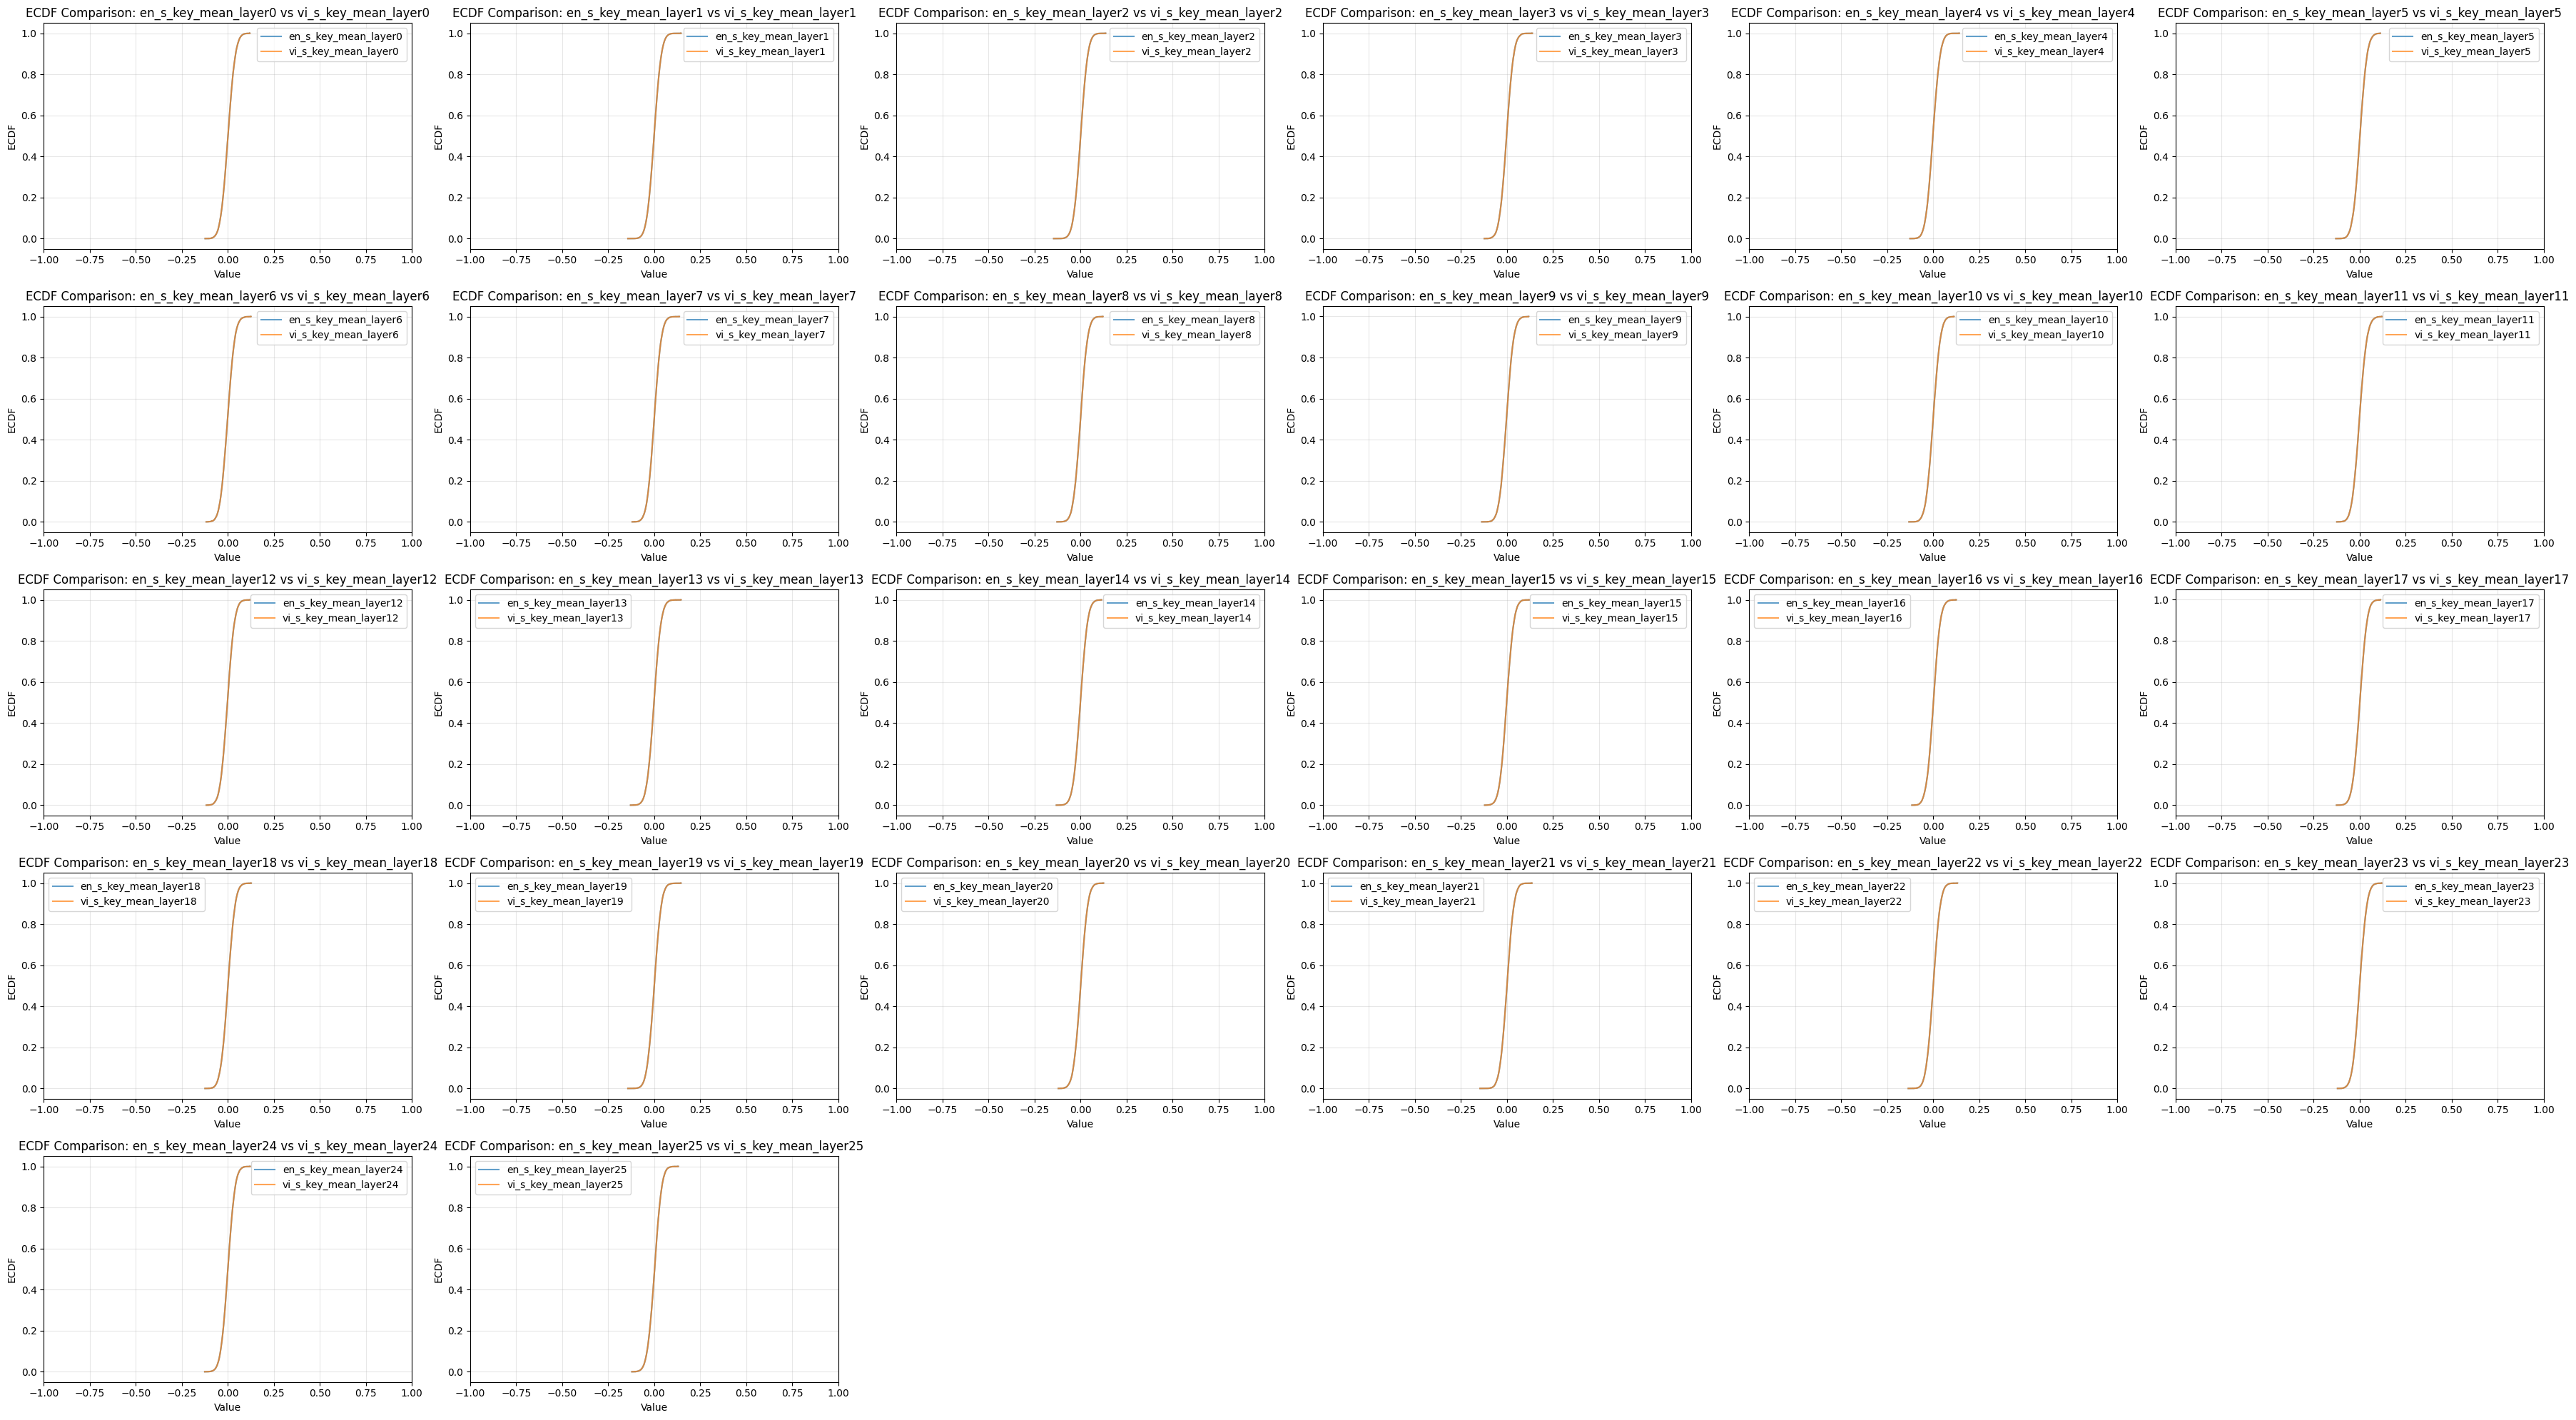

In [34]:
data_neu_enAvi_rela_result_per_layer = []
data_neu_enAvi_rela_result_per_layer_labels = []

for ilayer in range(26):
    single_layer = []
    for ikey in result_relation.keys():
        if f'layers.{ilayer}' in ikey:
            single_layer.extend(result_relation_spearman[ikey]['p'][0].tolist())
    
    data_neu_enAvi_rela_result_per_layer.append(np.array(single_layer))
    data_neu_enAvi_rela_result_per_layer.append(np.array(single_layer))
           

    data_neu_enAvi_result_per_layer_labels.append(f"layer.{ilayer}")
    data_neu_enAvi_result_per_layer_labels.append(f"layer.{ilayer}")
    #data_neu_enAvi_result_per_layer_labels.append(f'vi_s_key_mean_layer{ilayer}')
    
plot_ecdf_pairs(data_neu_enAvi_rela_result_per_layer, data_neu_enAvi_result_per_layer_labels, xdim_max =1, xdim_min = -1)

### pearson relation

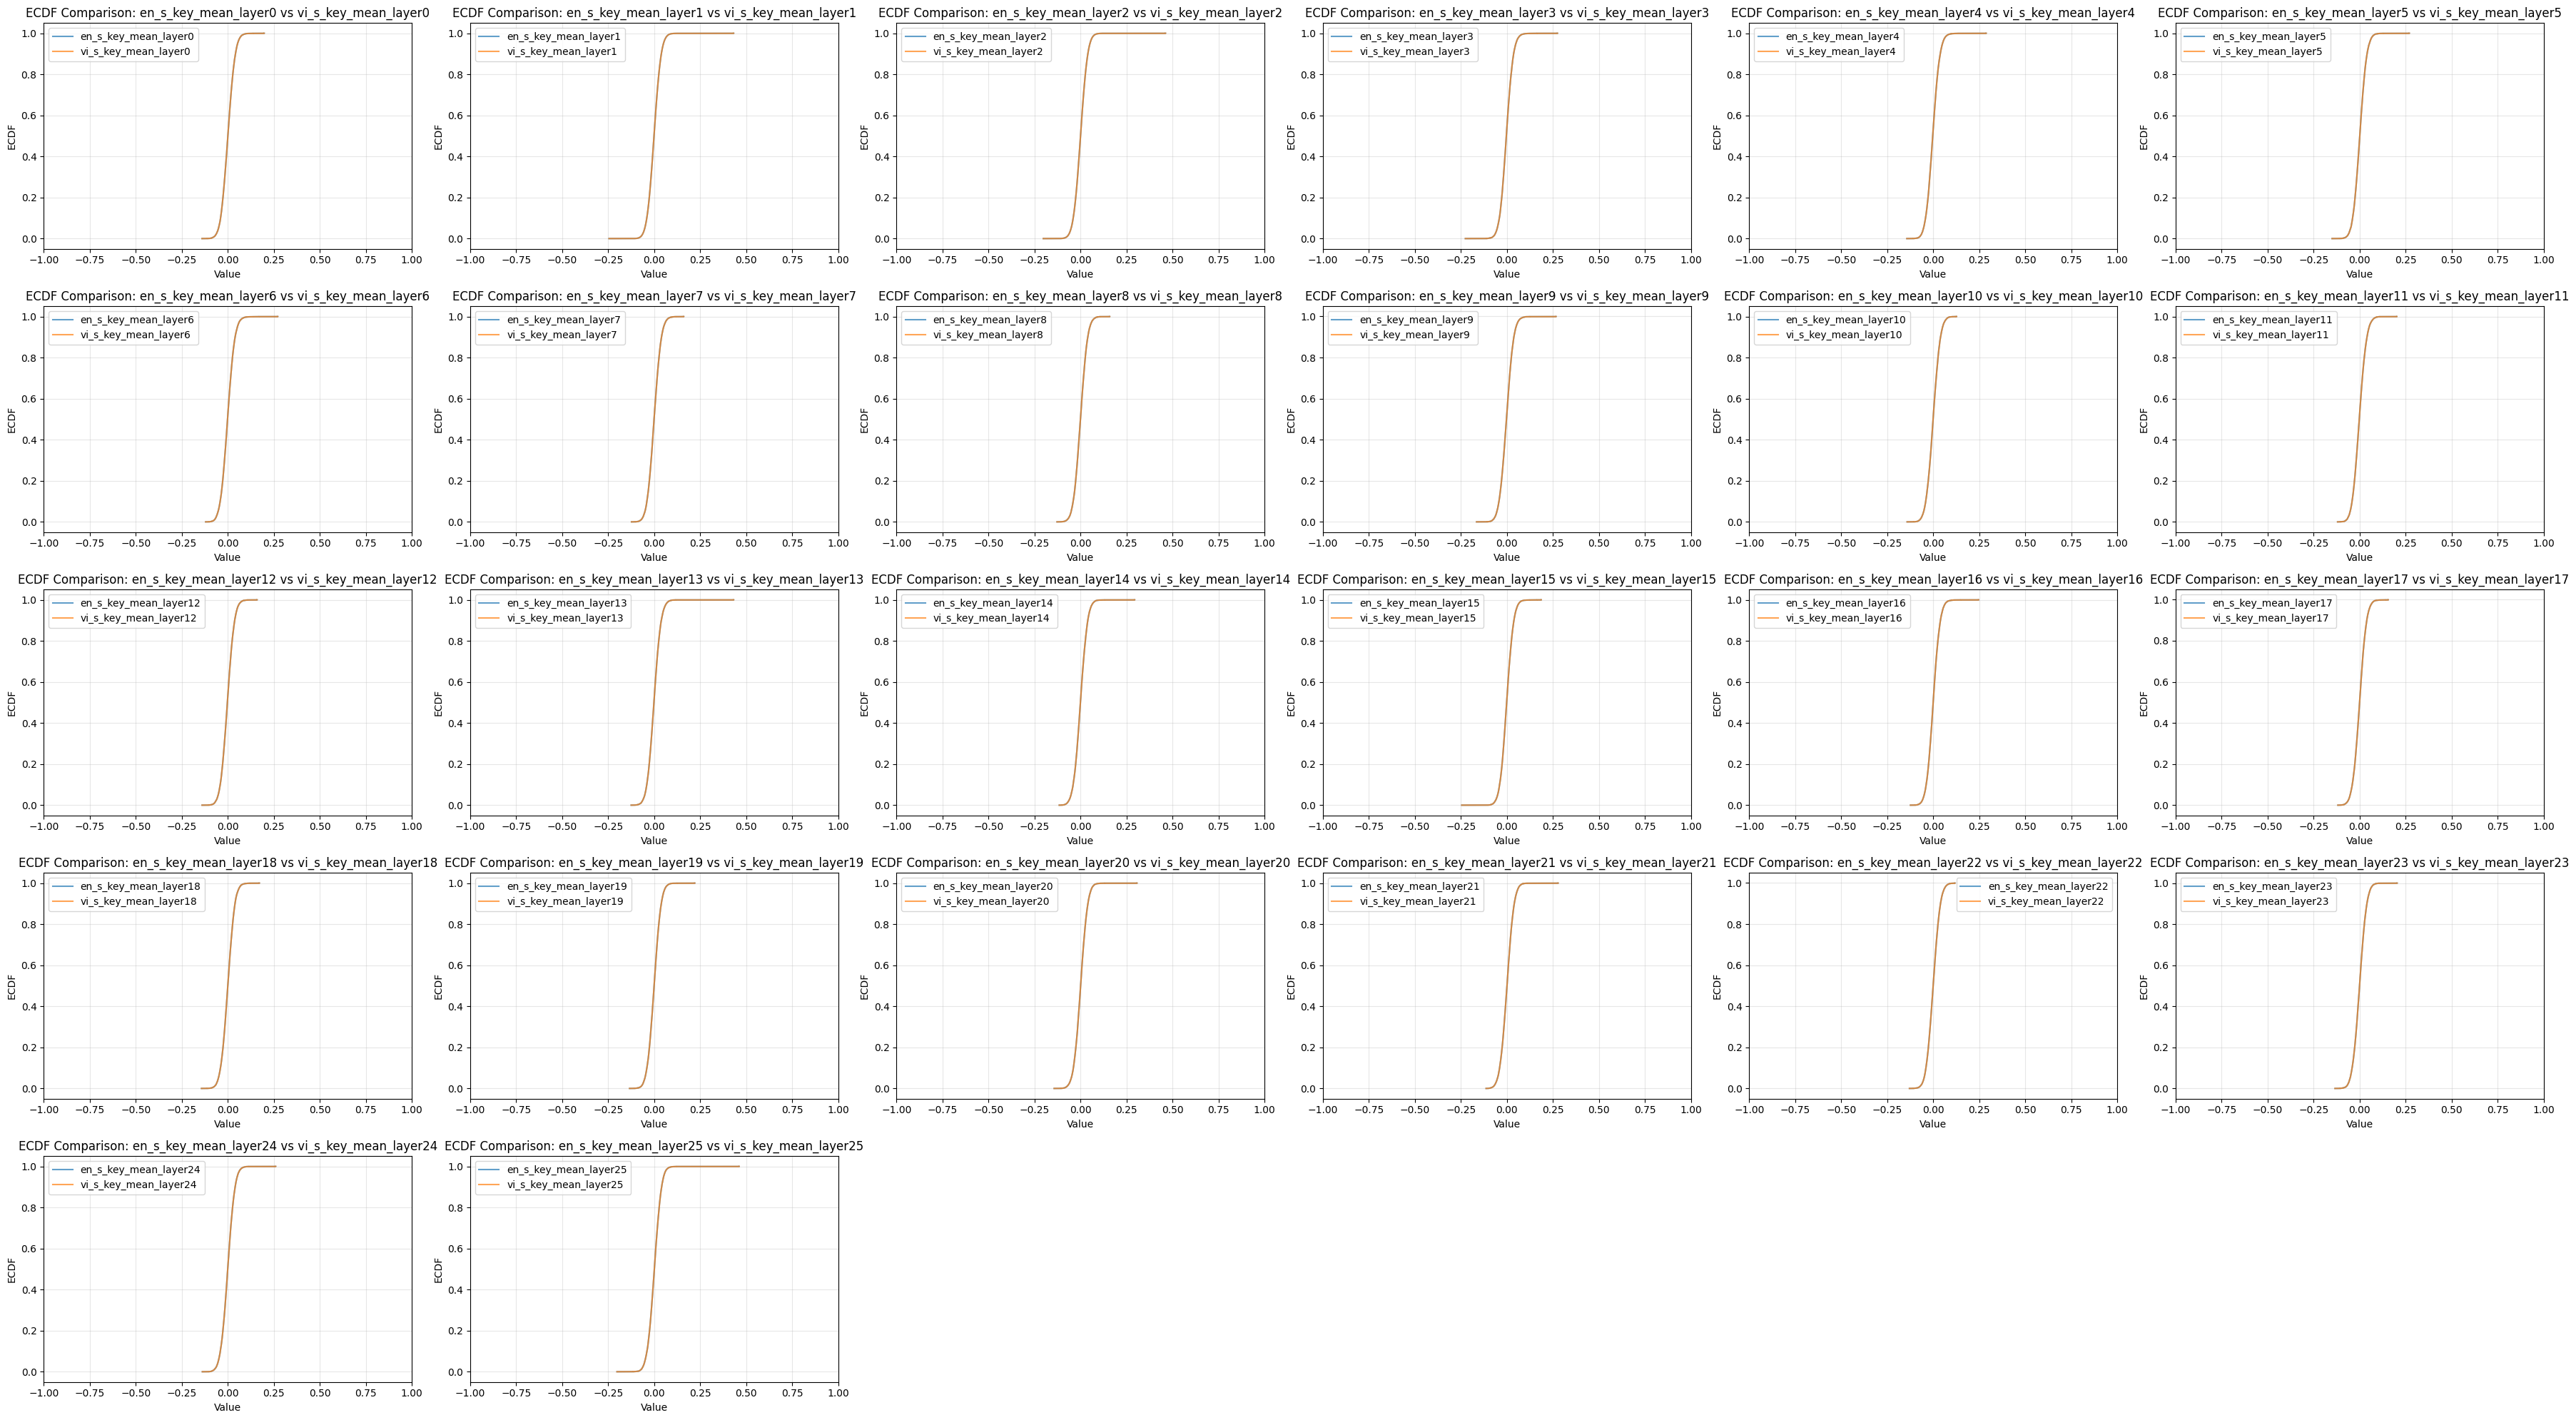

In [29]:
data_neu_enAvi_rela_result_per_layer = []
data_neu_enAvi_rela_result_per_layer_labels = []

for ilayer in range(26):
    single_layer = []
    for ikey in result_relation.keys():
        if f'layers.{ilayer}' in ikey:
            single_layer.extend(result_relation[ikey]['p'][0].tolist())
    
    data_neu_enAvi_rela_result_per_layer.append(np.array(single_layer))
    data_neu_enAvi_rela_result_per_layer.append(np.array(single_layer))
           

    data_neu_enAvi_result_per_layer_labels.append(f"layer.{ilayer}")
    data_neu_enAvi_result_per_layer_labels.append(f"layer.{ilayer}")
    #data_neu_enAvi_result_per_layer_labels.append(f'vi_s_key_mean_layer{ilayer}')
    
plot_ecdf_pairs(data_neu_enAvi_rela_result_per_layer, data_neu_enAvi_result_per_layer_labels, xdim_max =1, xdim_min = -1)

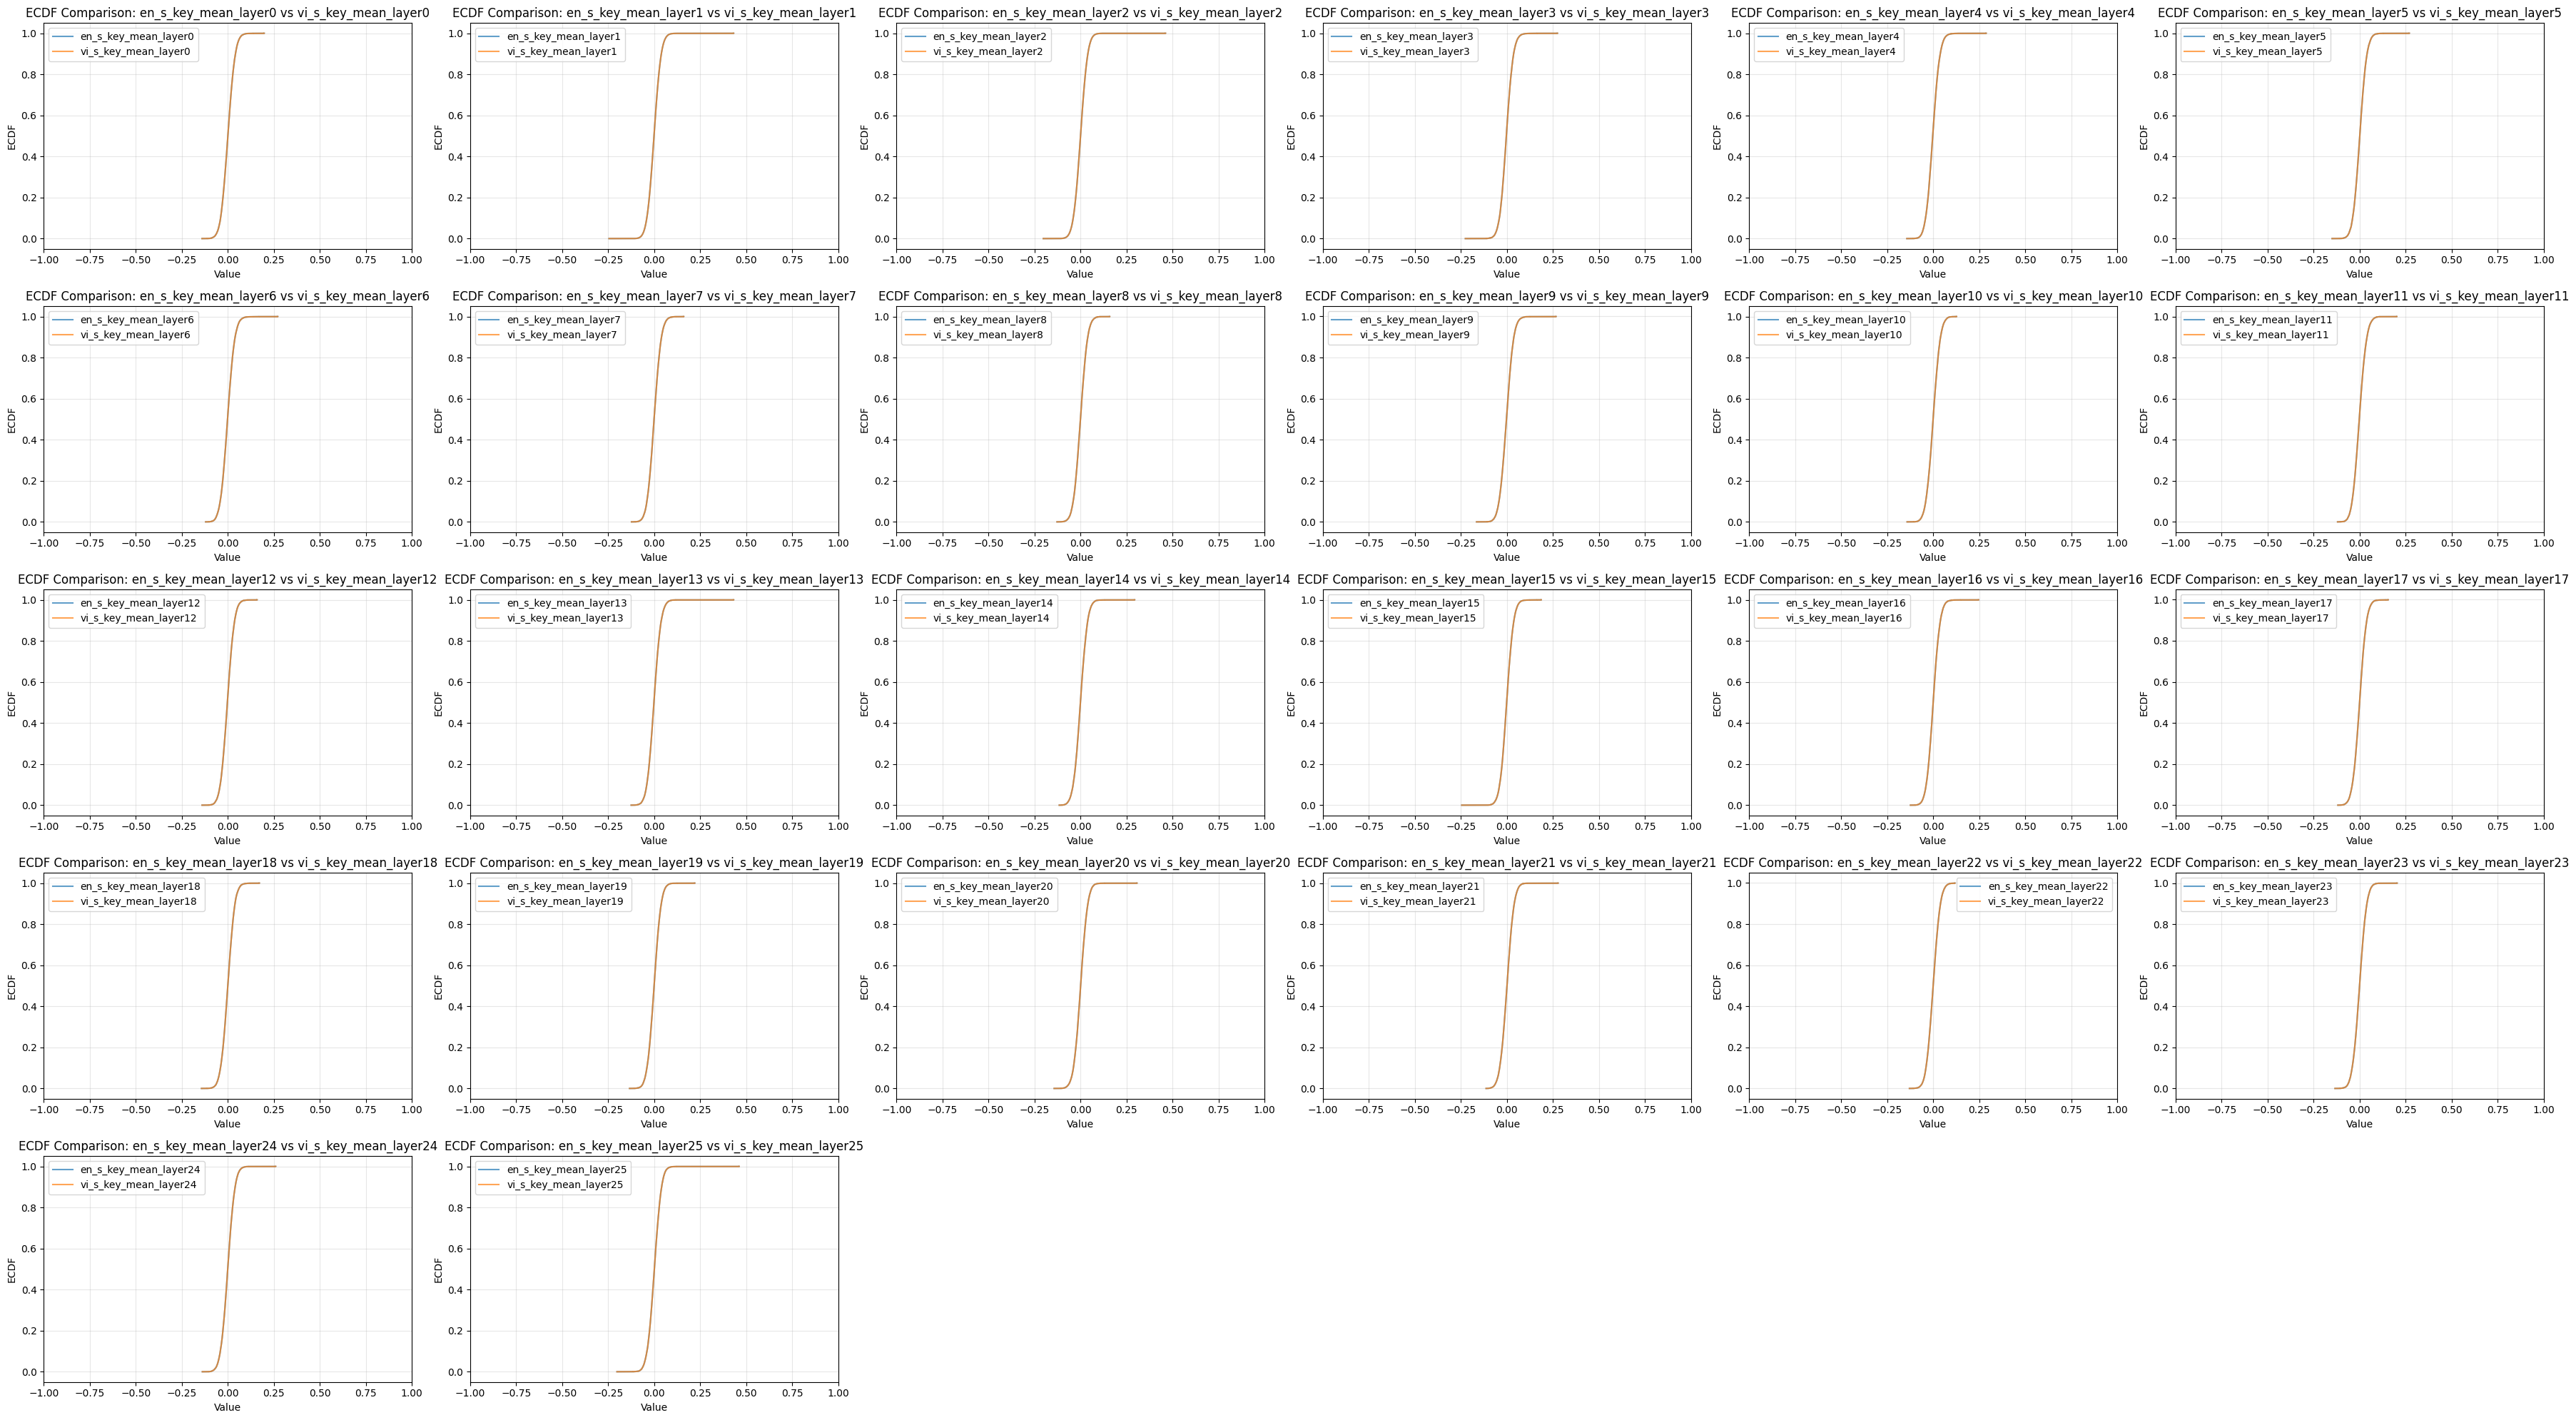

In [30]:
plot_ecdf_pairs(data_neu_enAvi_rela_result_per_layer, data_neu_enAvi_result_per_layer_labels, xdim_max =1, xdim_min = -1)

In [ ]:
data_neu_enAvi_rela_result_per_layer

In [68]:
data_neu_enAvi_result_per_layer_labels

['en_s_key_mean_layer0',
 'vi_s_key_mean_layer0',
 'en_s_key_mean_layer1',
 'vi_s_key_mean_layer1',
 'en_s_key_mean_layer2',
 'vi_s_key_mean_layer2',
 'en_s_key_mean_layer3',
 'vi_s_key_mean_layer3',
 'en_s_key_mean_layer4',
 'vi_s_key_mean_layer4',
 'en_s_key_mean_layer5',
 'vi_s_key_mean_layer5',
 'en_s_key_mean_layer6',
 'vi_s_key_mean_layer6',
 'en_s_key_mean_layer7',
 'vi_s_key_mean_layer7',
 'en_s_key_mean_layer8',
 'vi_s_key_mean_layer8',
 'en_s_key_mean_layer9',
 'vi_s_key_mean_layer9',
 'en_s_key_mean_layer10',
 'vi_s_key_mean_layer10',
 'en_s_key_mean_layer11',
 'vi_s_key_mean_layer11',
 'en_s_key_mean_layer12',
 'vi_s_key_mean_layer12',
 'en_s_key_mean_layer13',
 'vi_s_key_mean_layer13',
 'en_s_key_mean_layer14',
 'vi_s_key_mean_layer14',
 'en_s_key_mean_layer15',
 'vi_s_key_mean_layer15',
 'en_s_key_mean_layer16',
 'vi_s_key_mean_layer16',
 'en_s_key_mean_layer17',
 'vi_s_key_mean_layer17',
 'en_s_key_mean_layer18',
 'vi_s_key_mean_layer18',
 'en_s_key_mean_layer19',
 'vi_s

In [45]:
mean_diff

[0.00023478745424654335,
 -8.707778761163354e-05,
 -0.0002664269686647458,
 -0.00013238142128102481,
 1.3182201655581594e-05,
 -5.4263437050394714e-05,
 -0.0002950956331915222,
 -0.0004534808249445632,
 1.570439781062305e-05,
 0.00010918673615378793,
 -1.8308055587112904e-06,
 -0.0005048358434578404,
 -0.00041587491523387143,
 -0.0002726164530031383,
 3.691016900120303e-05,
 -3.861130971927196e-05,
 0.0004122239952266682,
 -0.00044001522110193036,
 -0.0005502562853507698,
 -0.00019877526210621,
 4.9323229177389294e-05,
 -0.00013075218885205686,
 -0.0002580929867690429,
 9.200818021781743e-05,
 9.71989102254156e-05,
 0.00023642323503736407,
 0.00021306915732566267,
 -0.0005435957664303714,
 -6.049926014384255e-05,
 -0.0006489293155027553,
 6.011886216583662e-05,
 0.00013480220513883978,
 -4.406459629535675e-05,
 5.74813648199779e-05,
 -0.0002870846292353235,
 0.00011700977847795002,
 -0.00026362590506323613,
 0.0007892475841799751,
 1.398497261106968e-05,
 -0.00024083453172352165,
 5.29

In [34]:
data_neu_result['model.layers.25.mlp.down_proj.weight']

{'mean': array([-2.38119264e-02, -3.45425341e-02, -1.53310498e-02, -3.43324443e-02,
        -2.32918262e-02,  5.44926193e-03, -1.20341827e-02,  6.18050496e-03,
        -5.81717491e-03,  1.43132408e-02, -2.97678775e-02, -1.96201404e-02,
        -1.79942714e-02, -8.21619564e-03,  3.97978392e-03, -5.57584564e-03,
         1.42397119e-02,  2.82128851e-02, -2.58416327e-02,  1.87514598e-02,
         8.51600369e-03, -2.96815899e-03, -1.18688742e-03, -1.85993910e-02,
         1.79726548e-03, -1.12243659e-02, -1.58983601e-02, -2.02607115e-02,
         4.49041526e-03, -6.94245762e-03,  8.59651508e-04, -7.90435407e-03,
         9.97444325e-03, -7.09260814e-04, -1.78002583e-02, -3.26603585e-02,
        -2.11065345e-03,  1.91532572e-03, -4.83536952e-02, -2.23678168e-02,
        -1.15232931e-02, -1.08075639e-03, -2.92652448e-02,  1.84377995e-02,
        -1.12490853e-02, -4.38274609e-03,  3.11696198e-03,  1.15826540e-02,
        -3.37575542e-03, -2.23004652e-02, -6.42160575e-04, -7.43108657e-03,
    

In [35]:
data_vi_neu_result['model.layers.25.mlp.down_proj.weight']

{'mean': array([-0.07093204, -0.05271608, -0.05006902, -0.04516286, -0.08126508,
        -0.0800415 , -0.08919949, -0.05059637, -0.12613365, -0.05594657,
        -0.04187763, -0.08214543, -0.06834735, -0.06023985, -0.05355349,
        -0.06986336, -0.05941318, -0.03074584, -0.04740571, -0.02717342,
        -0.05768245, -0.07339083, -0.05787617, -0.087263  , -0.05445906,
        -0.09850127, -0.05564315, -0.10485224, -0.04292427, -0.03076179,
        -0.06753568, -0.05106528, -0.06153915, -0.05471267, -0.06022271,
        -0.0541912 , -0.04697651, -0.05576254, -0.032357  , -0.09699886,
        -0.07704493, -0.03715025, -0.10409101, -0.04997383, -0.05166753,
        -0.05557119, -0.08023428, -0.04643232, -0.0440607 , -0.05313642,
        -0.06424081, -0.10415355, -0.04929743, -0.0679798 , -0.04326785,
        -0.05859665, -0.0892798 , -0.06259097, -0.05728916, -0.05374724,
        -0.05657242, -0.03226157, -0.07693531, -0.03986122, -0.0460888 ,
        -0.02805841, -0.06628784, -0.041565

## 分位数

In [18]:
get_key_quan(data_vi, 'model.layers.0.mlp.down_proj.weight')

10% 分位数: -0.474609375
25% 分位数: -0.201171875
50% 分位数: -0.00019693374633789062
75% 分位数: 0.1982421875
90% 分位数: 0.455078125


In [19]:
get_key_quan(data_vi,'model.layers.25.mlp.down_proj.weight')

10% 分位数: -2.109375
25% 分位数: -1.015625
50% 分位数: -0.0052490234375
75% 分位数: 1.0
90% 分位数: 2.109375


In [7]:
get_key_quan(data, 'model.layers.0.mlp.down_proj.weight')

10% 分位数: -0.25390625
25% 分位数: -0.107421875
50% 分位数: 0.003204345703125
75% 分位数: 0.11572265625
90% 分位数: 0.263671875


In [8]:
get_key_quan(data,'model.layers.25.mlp.down_proj.weight')

10% 分位数: -1.1015625
25% 分位数: -0.5234375
50% 分位数: 0.0034332275390625
75% 分位数: 0.53515625
90% 分位数: 1.1640625


In [9]:
get_key_quan(data,'model.layers.0.self_attn.q_proj.weight')

10% 分位数: -0.00677490234375
25% 分位数: -0.002593994140625
50% 分位数: -4.1909515857696533e-07
75% 分位数: 0.002410888671875
90% 分位数: 0.006439208984375


In [10]:
get_key_quan(data,'model.layers.25.self_attn.q_proj.weight')

10% 分位数: -0.00811767578125
25% 分位数: -0.0026702880859375
50% 分位数: 4.954636096954346e-07
75% 分位数: 0.002685546875
90% 分位数: 0.0079345703125


In [11]:
get_key_quan(data,'model.layers.25.self_attn.k_proj.weight')

10% 分位数: -0.0167236328125
25% 分位数: -0.006134033203125
50% 分位数: 0.0
75% 分位数: 0.005859375
90% 分位数: 0.016845703125


In [12]:
get_key_quan(data,'model.layers.25.self_attn.v_proj.weight')

10% 分位数: -0.134765625
25% 分位数: -0.054931640625
50% 分位数: -0.0020751953125
75% 分位数: 0.046142578125
90% 分位数: 0.119140625


In [13]:
get_key_quan(data,'model.layers.0.self_attn.v_proj.weight')

10% 分位数: -0.158203125
25% 分位数: -0.07080078125
50% 分位数: -0.00445556640625
75% 分位数: 0.060302734375
90% 分位数: 0.1376953125


In [14]:
#data['model.layers.0.mlp.down_proj.weight']

In [15]:
data.keys()

dict_keys(['model.embed_tokens.weight', 'model.layers.0.self_attn.q_proj.weight', 'model.layers.0.self_attn.k_proj.weight', 'model.layers.0.self_attn.v_proj.weight', 'model.layers.0.self_attn.o_proj.weight', 'model.layers.0.self_attn.q_norm.weight', 'model.layers.0.self_attn.k_norm.weight', 'model.layers.0.mlp.gate_proj.weight', 'model.layers.0.mlp.up_proj.weight', 'model.layers.0.mlp.down_proj.weight', 'model.layers.0.input_layernorm.weight', 'model.layers.0.post_attention_layernorm.weight', 'model.layers.0.pre_feedforward_layernorm.weight', 'model.layers.0.post_feedforward_layernorm.weight', 'model.layers.1.self_attn.q_proj.weight', 'model.layers.1.self_attn.k_proj.weight', 'model.layers.1.self_attn.v_proj.weight', 'model.layers.1.self_attn.o_proj.weight', 'model.layers.1.self_attn.q_norm.weight', 'model.layers.1.self_attn.k_norm.weight', 'model.layers.1.mlp.gate_proj.weight', 'model.layers.1.mlp.up_proj.weight', 'model.layers.1.mlp.down_proj.weight', 'model.layers.1.input_layernorm.